
Date: 03/16/2021
This is the code to analyze replicate A2 for the E1 trafficking experiment that was sorted on 02/09/21. The main goal of this experiment is two-fold:
1) check for the number of barcodes represented 

update - Feb 18 2023 - cutoff for NS to 1-55 (early NS), 56 -129 (late NS)


date: 04/14/21 
Verification that I did not mix up the samples. 
1. First thing was checking the number of cells from what I measured versus the percentage in the flow 
A2-1: 325,921
A2-2: 341,344
A2-3: 463,833
A2-4: 264,283
Percentages wise, they come to 23, 25, 33, 19 (pretty comparable to the flow doc): 
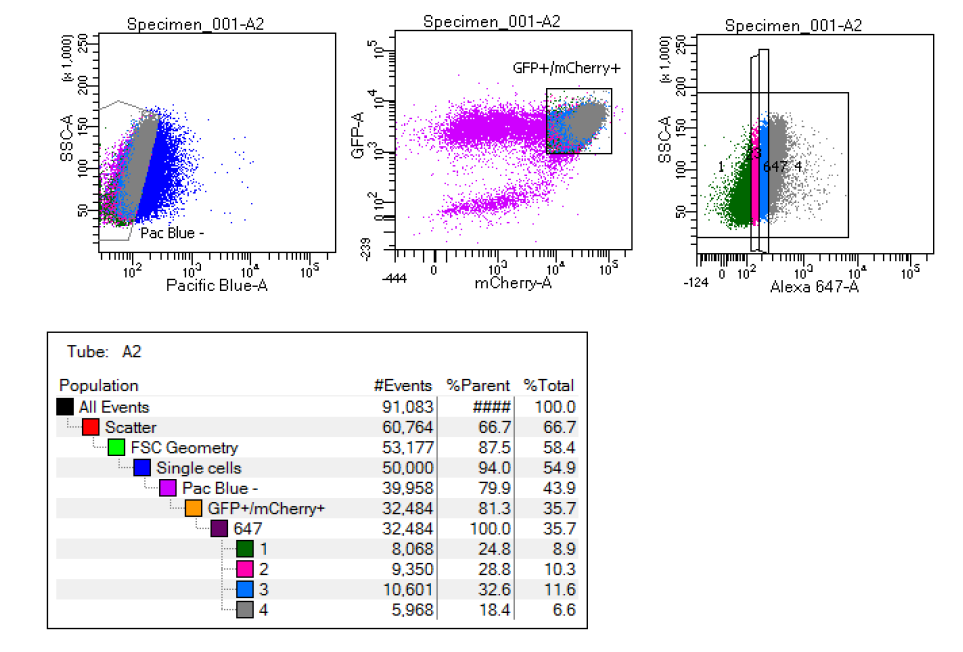


The PCR was done as follows: 

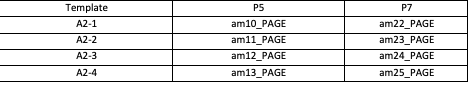

Doublechecked the indices with the PCR primer sequences - Good! So unless she switched the tubes in the beginning (unlikely) - we did not switch any samples.

The gates 1, 2, 3 and 4 are addressed by this gating here: 
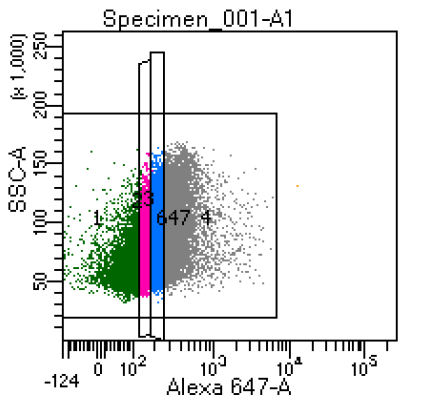

The barcodes for each of the samples are as follows: 
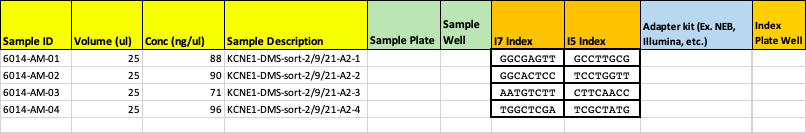

#### Update 0/723/21: 
Looking at the VAMPSeq paper to do the calculations that way (Matreyek et al Nat Gen 2018). 

Thoughts: 
* Need a variable Fv,total for filtering low frequency variants.  
* Scaling scores from 0 to 1 makes it more intuitive with WT scored as 1: do not need to change the weight calculation, but need to add weighting 
* 
#### Update 06/29/22:

New subA path: /scratch2/muhama1/E1_NGS_SubA_AG/barcodeTable_annotatedStrict.txt 
done by Andrew with 96% diversity. 

In [1]:
cd /scratch2/muhama1/6014-AM/

In [3]:
setwd("/scratch2/muhama1/6014-AM/")
library(data.table)
library(dplyr)
library(ggplot2)
library(tidyr)
library(RColorBrewer)
library(gplots)
library(colorspace)
library(ggpubr)

In [4]:
ls

070921_replicateA2_scores.txt
071921_replicateA2_scores_NAforZero.txt
6014-AM-01-GGCGAGTT-CCCCCCCC_S1_L005_R1_001.fastq.gz
6014-AM-01-GGCGAGTT-CCCCCCCC_S1_L005_R2_001.fastq.gz
6014-AM-02-GGCACTCC-CCCCCCCC_S1_L005_R1_001.fastq.gz
6014-AM-02-GGCACTCC-CCCCCCCC_S1_L005_R2_001.fastq.gz
6014-AM-03-AATGTCTT-CCCCCCCC_S1_L005_R1_001.fastq.gz
6014-AM-03-AATGTCTT-CCCCCCCC_S1_L005_R2_001.fastq.gz
6014-AM-04-TGGCTCGA-CCCCCCCC_S1_L005_R1_001.fastq.gz
6014-AM-04-TGGCTCGA-CCCCCCCC_S1_L005_R2_001.fastq.gz
6014-AM_project_summary.csv
bccountcombine.R
bccount.sh
bc_gate1.txt
bc_gate2.txt
bc_gate3.txt
bc_gate4.txt
gate1_BC_clean.txt
gate1_bc_counted.txt
gate1_R1.txt
gate1_R2.txt
gate2_BC_clean.txt
gate2_bc_counted.txt
gate2_R1.txt
gate2_R2.txt
gate3_BC_clean.txt
gate3_bc_counted.txt
gate3_R1.txt
gate3_R2.txt
gate4_BC_clean.txt
gate4_bc_counted.txt
gate4_R1.txt
gate4_R2.txt
heatmapE1_unscaled.pdf
normalized_counts_072321.txt
normalized_counts_withNArep_072321.txt
R1_eval_v1.py
raw_counts_072321.txt
score_d

In [6]:
gunzip -c 6014-AM-01-GGCGAGTT-CCCCCCCC_S1_L005_R1_001.fastq.gz | head

@A00758:155:HTNTFDSXY:1:1101:3332:1063 1:N:0:GGCGAGTT+GGGGGGGG
TCTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCAGCCGCGCCATTCCCTACCTTAAGCGTACGTCCGGAATTGCCGAGAT
+
FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
@A00758:155:HTNTFDSXY:1:1101:7220:1063 1:N:0:GGCGAGTT+GGGGGGGG
TCTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCCCAACGTGGCATAATACTCTTAAGCGTACGTCCGGAATTGCCGAGAT
+
FFF,FFF:FFFFFFFFFFFFFFFFFFFFF::FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF:,
@A00758:155:HTNTFDSXY:1:1101:10276:1063 1:N:0:GGCGAGTT+GGGGGGGG
TCTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCGACTGCGTATGACTTCACCTTAAGCGTACGTCCGGAATTGCCGAGAT

gzip: stdout: Broken pipe


For preliminary data, I am just going to pull the 4th line starting from line 2. 

In [9]:
gunzip -c 6014-AM-01-GGCGAGTT-CCCCCCCC_S1_L005_R1_001.fastq.gz | 
sed -n '2~4p' > gate1_R1.txt
# don't run this command on jupyter - 
# takes too long 

In [ ]:
gunzip -c 6014-AM-01-GGCGAGTT-CCCCCCCC_S1_L005_R2_001.fastq.gz | sed -n '2~4p' > gate1_R2.txt
# don't run this command on jupyter - 
# takes too long 

In [11]:
gunzip -c 6014-AM-02-GGCACTCC-CCCCCCCC_S1_L005_R2_001.fastq.gz | sed -n '2~4p' > gate2_R2.txt
# don't run this command on jupyter - 
# takes too long 

In [ ]:
gunzip -c 6014-AM-02-GGCACTCC-CCCCCCCC_S1_L005_R1_001.fastq.gz | sed -n '2~4p' > gate2_R1.txt
# don't run this command on jupyter - 
# takes too long 

In [12]:
gunzip -c 6014-AM-03-AATGTCTT-CCCCCCCC_S1_L005_R1_001.fastq.gz | sed -n '2~4p' > gate3_R1.txt
# don't run this command on jupyter - 
# takes too long 

In [ ]:
gunzip -c 6014-AM-03-AATGTCTT-CCCCCCCC_S1_L005_R2_001.fastq.gz | sed -n '2~4p' > gate3_R2.txt
# don't run this command on jupyter - 
# takes too long 

In [13]:
gunzip -c 6014-AM-04-TGGCTCGA-CCCCCCCC_S1_L005_R1_001.fastq.gz | sed -n '2~4p' > gate4_R1.txt
# don't run this command on jupyter - 
# takes too long 

In [14]:
gunzip -c 6014-AM-04-TGGCTCGA-CCCCCCCC_S1_L005_R2_001.fastq.gz | sed -n '2~4p' > gate4_R2.txt
# don't run this command on jupyter - 
# takes too long 

The above commands briefly unzip the file (line by line), pull out every 4th line starting from line 2 (the actual read) and save it to the file mentioned.

There is a corruption in the file for gate3/R2. Asking C to take a look into it. # update 03.31.21: We have good R1 files for all, and due to redundancy in the data, those can be used to pull barcodes 

In the meanwhile, what is pattern of the data we are looking at? 
The name of the file for genomic integration is G384A_pLenti-TetBxb1BFP-2A-iCasp9-2A-Blast_rtTA3_simple.gb

the AttP sequence:
gtttgtaccgtacaccactgagaccgcggtggttgaccagacaaacc

The assembly in 5101 says we only need R2 but then what is R1? Trying to figure that out. 


In [2]:
sed -n '2~4p' /scratch2/muhama1/E1_NGS_5101/5101-AM-5_S01_L005_R1_001.fastq | head

TNTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCCCGGCCGGTCGAGAAGAGCTTAAGCGTACGTCCGGAATTGCCGAGAT
TNTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCATAACCAATAAACGCCTCCTTAAGCGTACGTCCGGAATTGCCGAGAT
TNTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCTGAAAATAGCAGATAACACTTAAGCGTACGTCCGGAATTGCCGAGAT
TNTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCACTTTATCATCTGTCATTCTTAAGCGTACGTCCGGAATTGCCGAGAT
TNTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCAGACCATACATCTCACCCCTTAAGCGTACGTCCGGAATTCCGAGATC
TNTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCCCGCAGACATGTTGATGTCTTAAGCGTACGTCCGGAATTGCCGAGAT
TNTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGG

In [3]:
sed -n '2~4p' /scratch2/muhama1/E1_NGS_5101/5101-AM-5_S01_L005_R2_001.fastq | head

CGGCAATTCCGGACGTACGCTTAAGCTCTTCTCGACCGGCCGGGACGTCCTCTAGACGGCCATCTCAGCGCTCGAGCCGGCTTGTCGACGACGGCGGTCTCAGTGGTGTACGGTACAAACCGCCACCATGGTGTCTAAGGGCGAAGAAGAT
CGGCAATTCCGGACGTACGCTTAAGGAGGCGTTTATTGGTTATGACGTCCTCTAGACGGCCATCTCAGCGCTCGAGCCGGCTTGTCGACGACGGCGGTCTCAGTGGTGTACGGTACAAACCGCCACCATGGTGTCTAAGGGCGAAGAAGAT
CGGCAATTCCGGACGTACGCTTAAGTGTTATCTGCTATTTTCAGACGTCCTCTAGACGGCCATCTCAGCGCTCGAGCCGGCTTGTCGACGACGGCGGTCTCAGTGGTGTACGGTACAAACCGCCACCATGGTGTCTAAGGGCGAAGAAGAT
CGGCAATTCCGGACGTACGCTTAAGAATGACAGATGATAAAGTGACGTCCTCTAGACGGCCATCTCAGCGCTCGAGCCGGCTTGTCGACGACGGCGGTCTCAGTGGTGTACGGTACAAACCGCCACCATGGTGTCTAAGGGCGAAGAAGAT
CGGAATTCCGGACGTACGCTTAAGGGGTGAGATGTATGGTCTGACGTCCTCTAGACGGCCATCTCAGCGCTCGAGCCGGCTTGTCGACGACGGCGGTCTCAGTGGTGTACGGTACAAACCGCCACCATGGTGTCTAAGGGCGAAGAAGATC
CGGCAATTCCGGACGTACGCTTAAGACATCAACATGTCTGCGGGACGTCCTCTAGACGGCCATCTCAGCGCTCGAGCCGGCTTGTCGACGACGGCGGTCTCAGTGGTGTACGGTACAAACCGCCACCATGGTGTCTAAGGGCGAAGAAGAT
CGGCAATTCCGGACGTACGCTTAAGCATTCTTTTTTGCCATCAGACGTCCTCTAGACGGCCATCTCAGCGCTCGAGCCGGCTTGTCGA

In [4]:
head gate1_R1.txt

TCTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCAGCCGCGCCATTCCCTACCTTAAGCGTACGTCCGGAATTGCCGAGAT
TCTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCCCAACGTGGCATAATACTCTTAAGCGTACGTCCGGAATTGCCGAGAT
TCTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCGACTGCGTATGACTTCACCTTAAGCGTACGTCCGGAATTGCCGAGAT
TCTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCTTTGAAGATACTAAACCGCTTAAGCGTACGTCCGGAATTGCCGAGAT
TCTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCCGAGCGTACTACCCCGGCCTTAAGCGTACGTCCGGAATTGCCGAGAT
TCTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGGCCGTCTAGAGGACGTCGAAATGCACCCTCCGGTCCTTAAGCGTACGTCCGGAATTGCCGAGAT
TCTTCGCCCTTAGACACCATGGTGGCGGTTTGTACCGTACACCACTGAGACCGCCGTCGTCGACAAGCCGGCTCGAGCGCTGAGATGG

Here is an analysis of the primers.
Things to note, the indices are 8 bases, try 10 bases. 
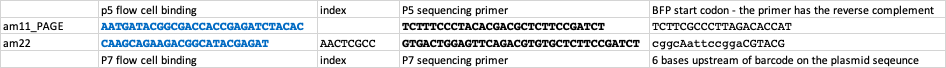

Since the R1s are complete for all the reads, will be using R1s to analyze. 

Here is a breakdown of R1 from the first gate, (gate1_R1.txt first line)

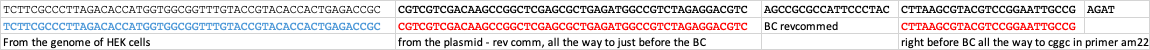

So here is the breakdown for the python script
Version 1 will work from the sed pulled files, and there will all be R1 so either:
1. the barcode will need to be rev comm'd at the end 
2. the read will need to be rev comm'd in the beginning

We will try the reverse complementation at the end because the length of the read might be variable. so the reverse complementation will only happen to the BC. 

In [77]:
# function copied from /scratch2/muhama1/E1_NGS_5101/R2_eval.py

def revComplement(read,length):
        readR = ["N"]*length
        bases= {"A":"T","C":"G","G":"C","T":"A","N":"N"}
        for j in range(len(read)):
                rev = length - j -1
                letter = read[j]
                readR[rev]=bases[letter]
        output = "".join(readR)
        return(output)
    
# tested the function and it works 3.31.21

# reading in the lines: 

rf = open("gate1_R1.txt","r")
wf = open("bc_gate1.txt","w")

keepGoing = True
count = 0

BCprefix = "GACGTC"
# there are 98 characters from start of R1 to the base right before BCprefix
BCsuffix = "CTTAAG"
# there are 122 characters from the start of R1 to the base right before BCsuffix.
goodPre = 0
goodPost = 0

while keepGoing:
    a = rf.readline().strip()
    if len(a)==0:
        break
    count +=1 
#    if count/500000 == count/500000.00:
#        print(count)
    preBC = a[98:104]
    postBC = a[122:128]
    if preBC == BCprefix:
        goodPre +=1 
        if postBC == BCsuffix:
            goodPost +=1 
            BC = a[104:122]
            wf.write(revComplement(BC,len(BC))+"\n")
        if count==100:
            break
        
print("Total reads analyzed",count)
print("Good barcode prefix (%of total reads)",goodPre,100*goodPre/count)
print("Good barcode suffix (% of good prefix, % of total reads)", goodPost, 100*goodPost/goodPre, 100*goodPost/count)

rf.close()
wf.close()

Total reads analyzed 100
Good barcode prefix (%of total reads) 94 0.94
Good barcode suffix (% of good prefix, % of total reads) 88 0.9361702127659575 0.88


This test below is just looking at how many unique barcodes in the first 100 reads picked up by this test. 

In [72]:
uniq -c bc_gate1.txt | sort -k1,1 -nr | wc -l

87


The script above is copy and pasted into a script in the directory called R1_eval_v1.py with the following code added to the top

    import sys
    file1 = sys.argv[1] # this is the name of the R1 file.
    # in this version, that file is just the reads pulled out from fastq file by sed 
    file2 = sys.argv[2] # this is the name of the output file 
    # in this version, the output file only contains a list of BC in that gate

In [78]:
chmod +x R1_eval_v1.py

In [79]:
./R1_eval_v1.py gate1_R1.txt bc_gate1.txt
# don't run this command on jupyter - 
# it doesn't read the header identifier needed for a script in bash

bash: ./R1_eval_v1.py: /usr/bin/python: bad interpreter: No such file or directory


: 126

The output of the above command on bash is as follows: 

    ('Total reads analyzed', 142876953)
    ('Good barcode prefix (%of total reads)', 132455955, 93)
    ('Good barcode suffix (% of good prefix, % of total reads)', 127661316, 96, 89)

Great representation of good barcodes. I think we don't have a bottleneck at this stage. Next is looking at the representation of the barcodes in the gate. 

In [ ]:
./R1_eval_v1.py gate2_R1.txt bc_gate2.txt
# don't run this command on jupyter - 
# it doesn't read the header identifier needed for a script in bash

The ouput of the above command is as follows:

    ('Total reads analyzed', 119291603)
    ('Good barcode prefix (%of total reads)', 112847938, 94)
    ('Good barcode suffix (% of good prefix, % of total reads)', 108789613, 96, 91)

In [4]:
./R1_eval_v1.py gate3_R1.txt bc_gate3.txt
# don't run this command on jupyter - 
# it doesn't read the header identifier needed for a script in bash

bash: ./R1_eval_v1.py: /usr/bin/python: bad interpreter: No such file or directory


: 126

In [4]:
./R1_eval_v1.py gate4_R1.txt bc_gate4.txt
# don't run this command on jupyter - 
# it doesn't read the header identifier needed for a script in bash

bash: ./R1_eval_v1.py: /usr/bin/python: bad interpreter: No such file or directory


: 126

the output of the above command is as follows:

    ('Total reads analyzed', 138799510)
    ('Good barcode prefix (%of total reads)', 133873461, 96)
    ('Good barcode suffix (% of good prefix, % of total reads)', 129107057, 96, 93)

Because each of the files generated from python is really large, the sorting and processing is taking really long. The next few steps are doing the following
1. "split" breaking the file into segments of 3mill lines each
2. "for" loop is sorting the file, then counting barcodes, and adding the count of the barcodes to a new file
3. "for" loop is concatenating all the files into a new file. 

In [31]:
split -l 3000000 -d bc_gate1.txt file

for i in {00..42}; do sort -k1,1 file$i | uniq -c > test_$i & done

[1] 2827933
[2] 2827935
[3] 2827937
[4] 2827939
[5] 2827941
[6] 2827943
[7] 2827945
[8] 2827947
[9] 2827949
[10] 2827951
[11] 2827953
[12] 2827955
[13] 2827957
[14] 2827959
[15] 2827961
[16] 2827963
[17] 2827965
[18] 2827967
[19] 2827969
[20] 2827971
[21] 2827973
[22] 2827975
[23] 2827977
[24] 2827979
[25] 2827981
[26] 2827983
[27] 2827985
[28] 2827987
[29] 2827989
[30] 2827991
[31] 2827993
[32] 2827995
[33] 2827997
[34] 2827999
[35] 2828001
[36] 2828003
[37] 2828005
[38] 2828007
[39] 2828009
[40] 2828011
[41] 2828013
[42] 2828015
[43] 2828017


The output above means that there are 43 different segments of the gate1_barcode files. The next step is concatenating the files. Because the step above is parallelized - the cat will continue with whatever is in the files - you need to wait to make sure the above command is done running. Check with ls. or better yet - go to the bathroom and come back. 

In [ ]:
for i in {00..42}; do wc -l test_$i; done

The above command will put out a list of line numbers you can add on excel etc to verify the file number of the file file below. 

In [36]:
cat test_* > gate1_bc_counted.txt
rm test_*
rm file*
# do not run this block without running the split etc again 
# because that will reset the gate1_bc_counted.txt file empty


In [38]:
wc -l gate1_bc_counted.txt

6798076 gate1_bc_counted.txt


In [37]:
head gate1_bc_counted.txt

     16 AAAAAAAACACTCCGATA
     27 AAAAAAAACGAACGCAGT
     20 AAAAAAACACGGCTAAGC
      1 AAAAAAACACGGCTGAGC
      1 AAAAAAACACTGCTAAGC
     10 AAAAAAACTAGTTAATTC
     10 AAAAAAACTTTAACCCTG
      1 AAAAAAAGAGGGGGCGCG
     14 AAAAAACAGTTCCACTAA
      1 AAAAAACCAGTATAAGCT


In [3]:
./bccount.sh bc_gate2.txt gate2_bc_counted.txt
# don't run this command on jupyter - takes too long
# bash script that essentially does from split to wc of combined file above

This script essentially does from split to wc of combined file above
There are timers built in to make sure that the concatenation is not happening before the files have been fully processed. The script was checked to be correct on 04/1/21

In [84]:
./bccount.sh bc_gate3.txt gate3_bc_counted.txt

name of original barcode file bc_gate3.txt
name of output combined file gate3_bc_counted.txt
counting lines of original barcode file
96570592

splitting original BC file into segments of 4mill lines each

wait for 10 seconds

number of segments
24

sorting and counting barcodes per segment
sample segment file
CTAGAATCCATAAGTTTC
ACCACCGTGGAGGGGAGT
TCATTCGATACGCAATAT
AGTGTAACGTCGTACACG
CGCGTAAGCATCGAGCCG
AAACTGATGAGGGTGGGC
GTGTAATTCGAAGTACTC
CAACCTGAAGTAGAAAGT
TGCGGATCTGTTTCAACC
TCTTGAATCAAAAATTTC

wait for 2 minutes

sample counted file by segment
      4 AAAAAAAACACTCCGATA
     61 AAAAAAAACGAACGCAGT
      1 AAAAAAAATTTCGAAGAG
     37 AAAAAAAATTTCGAATAG
     60 AAAAAAACACGGCTAAGC
      5 AAAAAAACCATTTTATTT
    108 AAAAAAACTAGTTAATTC
      1 AAAAAAACTAGTTAGTTC
      1 AAAAAAACTGGTTAATTC
      1 AAAAAAATCCGTACTTTT

manual count of individual counted segments is stored in test.txt
please verify by summing column 1 in R
awk calculates the manual count as
4773348

final count of the combined

In [12]:
# an example code to test the manual file from script above
df <- fread("test.txt", header=F, stringsAsFactors = F)
head(df)
sum(df$V1)

V1,V2
<int>,<chr>
208340,test_00
206157,test_01
208371,test_02
206892,test_03
212557,test_04
208779,test_05


[1] 6780141

In [89]:
./bccount.sh bc_gate4.txt gate4_bc_counted.txt

name of original barcode file bc_gate4.txt
name of output combined file gate4_bc_counted.txt
counting lines of original barcode file
129107057

splitting original BC file into segments of 4mill lines each

wait for 10 seconds

number of segments
32

sorting and counting barcodes per segment
sample segment file
AAGACTTGACTTGTTTGT
CACTGCTATAAGACGGTC
TTGGATGTTCATGACGGA
AATTCAATCTGTTCTCAC
ACATGTTTCAAACCAGCT
GGTCGGTAATGGAGTGGG
CGTAGTGTGGGAAACTTG
GGCTAATGAGCTCGGCGC
TAGAAAAAGAAATCTTTA
GCTGTGGCTATTTGCGAT

wait for 2 minutes

sample counted file by segment
     17 AAAAAAAACGAACGCAGT
      1 AAAAAAAAGTGACTTGCT
      1 AAAAAAAATGACTCGTTT
     96 AAAAAAACACGGCTAAGC
      1 AAAAAAACATTAACCCTG
      1 AAAAAAACCATTCCAGCA
     28 AAAAAAACCATTTTATTT
     52 AAAAAAACTAGTTAATTC
      1 AAAAAAACTAGTTACTTC
      1 AAAAAAACTCGGCTAAGC

manual count of individual counted segments is stored in test.txt
please verify by summing column 1 in R
awk calculates the manual count as
6780141

final count of the combine

You cannot simply sort and do uniq -c again to the "counted" files because it would look at the count from before and the barcode (i.e. the whole line) to determine if it is unique and count that. To combine the database, you will need to switch to R.

In [5]:

getwd()
df <- fread("gate1_bc_counted.txt", header=F, stringsAsFactors = F)
head(df)
nrow(df)

num <- aggregate(V1~V2,df,length)
names(num)[2] <- 'num'

totalB <- aggregate(V1~V2,df,sum)
names(totalB)[2] <- 'totalB'

a <- merge(num,totalB)
head(a)

[1] "/scratch2/muhama1/6014-AM"

V1,V2
<int>,<chr>
16,AAAAAAAACACTCCGATA
27,AAAAAAAACGAACGCAGT
20,AAAAAAACACGGCTAAGC
1,AAAAAAACACGGCTGAGC
1,AAAAAAACACTGCTAAGC
10,AAAAAAACTAGTTAATTC


[1] 6798076

,V2,num,totalB
,<chr>,<int>,<int>
1,AAAAAAAAAAGGGGGGGT,1,1
2,AAAAAAAAAATTTCGGTA,1,1
3,AAAAAAAAACGATATTGG,1,1
4,AAAAAAAAACGGGGTGTG,1,1
5,AAAAAAAACACTCCGAGA,1,1
6,AAAAAAAACACTCCGATA,43,539


In [6]:
#verification of the db above
grep AAAAAAAACACTCCGATA gate1_bc_counted.txt > test.txt
#can replace the string after grep with any barcode from the table above 

In [7]:
df <- fread("test.txt", header=F, stringsAsFactors = F)
head(df)
sum(df$V1)
nrow(df)

V1,V2
<int>,<chr>
16,AAAAAAAACACTCCGATA
23,AAAAAAAACACTCCGATA
15,AAAAAAAACACTCCGATA
16,AAAAAAAACACTCCGATA
12,AAAAAAAACACTCCGATA
15,AAAAAAAACACTCCGATA


[1] 539

[1] 43

Need to generate this kinda table (a for reference) for every gate next. Copied the code from the cell above and wrote a script for it which will be run for each of the gates in the cell below. The script is ./bccountcombine.R 

In [7]:
./bccountcombine.R gate1_bc_counted.txt gate1_BC_clean.txt

[1] "The concatenated count-by-segment file"
   V1                 V2
1: 16 AAAAAAAACACTCCGATA
2: 27 AAAAAAAACGAACGCAGT
3: 20 AAAAAAACACGGCTAAGC
4:  1 AAAAAAACACGGCTGAGC
5:  1 AAAAAAACACTGCTAAGC
6: 10 AAAAAAACTAGTTAATTC
[1] ""
[1] "This file has the following rows:"
[1] 6798076
[1] ""
[1] "barcode presence in number of segments counted"
[1] ""
[1] "total presence of barcodes in gate summed"
[1] ""
[1] "The final clean table"
                  V2 num totalB
1 AAAAAAAAAAGGGGGGGT   1      1
2 AAAAAAAAAATTTCGGTA   1      1
3 AAAAAAAAACGATATTGG   1      1
4 AAAAAAAAACGGGGTGTG   1      1
5 AAAAAAAACACTCCGAGA   1      1
6 AAAAAAAACACTCCGATA  43    539
[1] "This table has the following rows"
[1] 2395912


In [97]:
./bccountcombine.R gate2_bc_counted.txt gate2_BC_clean.txt

[1] "The concatenated count-by-segment file"
    V1                 V2
1:   1 AAAAAAAACACTCAGATA
2: 145 AAAAAAAACACTCCGATA
3:   1 AAAAAAAACACTCCGTTA
4:   1 AAAAAAAACACTCTGATA
5:  19 AAAAAAAACGAACGCAGT
6:   1 AAAAAAAATGTACTTTAT
[1] ""
[1] "This file has the following rows:"
[1] 5448971
[1] ""
[1] "barcode presence in number of segments counted"
[1] ""
[1] "total presence of barcodes in gate summed"
[1] ""
[1] "The final clean table"
                  V2 num totalB
1 AAAAAAAAAACTCCGATA   3      3
2 AAAAAAAAAAGGCGTCGA   1      1
3 AAAAAAAAAATTTCGGGA   1      1
4 AAAAAAAAAATTTCGGTA   2      2
5 AAAAAAAAACGGCTAAGC   1      1
6 AAAAAAAACACCCCGAGA   1      1
[1] "This table has the following rows"
[1] 2171178


In [98]:
./bccountcombine.R gate3_bc_counted.txt gate3_BC_clean.txt

[1] "The concatenated count-by-segment file"
   V1                 V2
1:  4 AAAAAAAACACTCCGATA
2: 61 AAAAAAAACGAACGCAGT
3:  1 AAAAAAAATTTCGAAGAG
4: 37 AAAAAAAATTTCGAATAG
5: 60 AAAAAAACACGGCTAAGC
6:  5 AAAAAAACCATTTTATTT
[1] ""
[1] "This file has the following rows:"
[1] 4773348
[1] ""
[1] "barcode presence in number of segments counted"
[1] ""
[1] "total presence of barcodes in gate summed"
[1] ""
[1] "The final clean table"
                  V2 num totalB
1 AAAAAAAAACCGACTGTT   1      1
2 AAAAAAAACACACCGATA   1      1
3 AAAAAAAACACTCCGATA  25    108
4 AAAAAAAACGAACGCAGA   1      1
5 AAAAAAAACGAACGCAGT  25   1490
6 AAAAAAAACGAACGCATT   1      1
[1] "This table has the following rows"
[1] 1754097


In [99]:
./bccountcombine.R gate4_bc_counted.txt gate4_BC_clean.txt

[1] "The concatenated count-by-segment file"
   V1                 V2
1: 17 AAAAAAAACGAACGCAGT
2:  1 AAAAAAAAGTGACTTGCT
3:  1 AAAAAAAATGACTCGTTT
4: 96 AAAAAAACACGGCTAAGC
5:  1 AAAAAAACATTAACCCTG
6:  1 AAAAAAACCATTCCAGCA
[1] ""
[1] "This file has the following rows:"
[1] 6780141
[1] ""
[1] "barcode presence in number of segments counted"
[1] ""
[1] "total presence of barcodes in gate summed"
[1] ""
[1] "The final clean table"
                  V2 num totalB
1 AAAAAAAAAAGAACCCTT   1      1
2 AAAAAAAAAAGGGGGGGT   1      1
3 AAAAAAAAAATTTCGGTA   6      6
4 AAAAAAAAACCGACTGTA   2      2
5 AAAAAAAAATCCACACCG   1      1
6 AAAAAAAACACTCCGATA  11     16
[1] "This table has the following rows"
[1] 2579412


Next step is to merge each of the gates files together, and with the subassembly file of barcodes that correspond to mutations - there are ~50k barcodes that passed QC in the subassembly. 

Note: R pearl %>% works like pipe or | in bash 

In [8]:
a <- fread("gate1_BC_clean.txt", header=T, stringsAsFactors = F)
colnames(a) = c("barcode","num.seg.G1","count.G1")
#head(a)
print("Read in Gate 1")

b <- fread("gate2_BC_clean.txt", header=T, stringsAsFactors = F)
colnames(b) = c("barcode","num.seg.G2","count.G2")
#head(b)
print("Read in Gate 2")

c <- fread("gate3_BC_clean.txt", header=T, stringsAsFactors = F)
colnames(c) = c("barcode","num.seg.G3","count.G3")
#head(c)
print("Read in Gate 3")

d <- fread("gate4_BC_clean.txt", header=T, stringsAsFactors = F)
colnames(d) = c("barcode","num.seg.G4","count.G4")
#head(d)
print("Read in Gate 4")

fulldf <- a %>% 
    full_join(b, by="barcode") %>%
        full_join(c,by="barcode") %>% 
            full_join(d,by="barcode")
print("Total merged table")
head(fulldf)

print("Number of rows in merged table")
nrow(fulldf)


[1] "Read in Gate 1"
[1] "Read in Gate 2"
[1] "Read in Gate 3"
[1] "Read in Gate 4"
[1] "Total merged table"


barcode,num.seg.G1,count.G1,num.seg.G2,count.G2,num.seg.G3,count.G3,num.seg.G4,count.G4
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAAAAAAAAAGGGGGGGT,1,1,NA,NA,NA,NA,1,1
AAAAAAAAAATTTCGGTA,1,1,2,2,NA,NA,6,6
AAAAAAAAACGATATTGG,1,1,NA,NA,NA,NA,NA,NA
AAAAAAAAACGGGGTGTG,1,1,NA,NA,NA,NA,NA,NA
AAAAAAAACACTCCGAGA,1,1,2,2,NA,NA,NA,NA
AAAAAAAACACTCCGATA,43,539,28,4482,25,108,11,16


[1] "Number of rows in merged table"


[1] 6620929

In [9]:
# 072321: writing full merged table in case of future manipulations:
fwrite(fulldf, "raw_counts_072321.txt", quote = F, row.names = F, sep ="\t")

In [ ]:
head raw_counts_072321.txt
wc -l raw_counts_072321.txt

In [10]:
fulldf <- fread("raw_counts_072321.txt", header=T, stringsAsFactors = F)
head(fulldf)
nrow(fulldf)

barcode,num.seg.G1,count.G1,num.seg.G2,count.G2,num.seg.G3,count.G3,num.seg.G4,count.G4
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAAAAAAAAAGGGGGGGT,1,1,NA,NA,NA,NA,1,1
AAAAAAAAAATTTCGGTA,1,1,2,2,NA,NA,6,6
AAAAAAAAACGATATTGG,1,1,NA,NA,NA,NA,NA,NA
AAAAAAAAACGGGGTGTG,1,1,NA,NA,NA,NA,NA,NA
AAAAAAAACACTCCGAGA,1,1,2,2,NA,NA,NA,NA
AAAAAAAACACTCCGATA,43,539,28,4482,25,108,11,16


[1] 6620929

Next step is to normalize the reads per barcode by the total number of reads in the sample. This is because there is a different number of reads across the 4 gates/VANTAGE samples. This will be done by:
    # of raw reads in G1/# total reads in G1
and the same for G2, G3 and G4

In [11]:
head(fulldf)
totalG1 <- sum(fulldf$count.G1, na.rm=T)

totalG2 <- sum(fulldf$count.G2, na.rm=T)

totalG3 <- sum(fulldf$count.G3, na.rm=T)

totalG4 <- sum(fulldf$count.G4, na.rm=T)

print("normalizing reads across gates (reads per million)")
fulldf_norm <- fulldf %>%
        mutate(norm.count.G1 = 1e6*count.G1/totalG1,
               norm.count.G2 = 1e6*count.G2/totalG2,
               norm.count.G3 = 1e6*count.G3/totalG3,
               norm.count.G4 = 1e6*count.G4/totalG4,
               fvtot = (count.G1 + count.G2 + count.G3 + count.G4)/(totalG1+totalG2+totalG3+totalG4) 
        ) %>% select(-num.seg.G1,-num.seg.G2,-num.seg.G3,-num.seg.G4) 

head(fulldf_norm)

# replacing NAs with 0s for alternate calculations 
fulldf_norm_0 <- fulldf %>% mutate_if(is.numeric, replace_na, 0) %>%
            mutate(
               norm.count.G1 = 1e6*count.G1/totalG1,
               norm.count.G2 = 1e6*count.G2/totalG2,
               norm.count.G3 = 1e6*count.G3/totalG3,
               norm.count.G4 = 1e6*count.G4/totalG4,
               fvtot = (count.G1 + count.G2 + count.G3 + count.G4)/(totalG1+totalG2+totalG3+totalG4)
        ) %>% select(-num.seg.G1,-num.seg.G2,-num.seg.G3,-num.seg.G4) 

head(fulldf_norm_0)

barcode,num.seg.G1,count.G1,num.seg.G2,count.G2,num.seg.G3,count.G3,num.seg.G4,count.G4
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAAAAAAAAAGGGGGGGT,1,1,NA,NA,NA,NA,1,1
AAAAAAAAAATTTCGGTA,1,1,2,2,NA,NA,6,6
AAAAAAAAACGATATTGG,1,1,NA,NA,NA,NA,NA,NA
AAAAAAAAACGGGGTGTG,1,1,NA,NA,NA,NA,NA,NA
AAAAAAAACACTCCGAGA,1,1,2,2,NA,NA,NA,NA
AAAAAAAACACTCCGATA,43,539,28,4482,25,108,11,16


[1] "normalizing reads across gates (reads per million)"


barcode,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAAAAAAAAAGGGGGGGT,1,NA,NA,1,0.007833226,NA,NA,0.00774551,NA
AAAAAAAAAATTTCGGTA,1,2,NA,6,0.007833226,0.01838411,NA,0.04647306,NA
AAAAAAAAACGATATTGG,1,NA,NA,NA,0.007833226,NA,NA,NA,NA
AAAAAAAAACGGGGTGTG,1,NA,NA,NA,0.007833226,NA,NA,NA,NA
AAAAAAAACACTCCGAGA,1,2,NA,NA,0.007833226,0.01838411,NA,NA,NA
AAAAAAAACACTCCGATA,539,4482,108,16,4.222109069,41.19878614,1.118353,0.12392816,1.113327e-05


barcode,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAAAAAAAAAGGGGGGGT,1,0,0,1,0.007833226,0.00000000,0.000000,0.00774551,4.327800e-09
AAAAAAAAAATTTCGGTA,1,2,0,6,0.007833226,0.01838411,0.000000,0.04647306,1.947510e-08
AAAAAAAAACGATATTGG,1,0,0,0,0.007833226,0.00000000,0.000000,0.00000000,2.163900e-09
AAAAAAAAACGGGGTGTG,1,0,0,0,0.007833226,0.00000000,0.000000,0.00000000,2.163900e-09
AAAAAAAACACTCCGAGA,1,2,0,0,0.007833226,0.01838411,0.000000,0.00000000,6.491700e-09
AAAAAAAACACTCCGATA,539,4482,108,16,4.222109069,41.19878614,1.118353,0.12392816,1.113327e-05


In [12]:
# writing tables so can start analyses later on if need to redo 
fwrite(fulldf_norm,"normalized_counts_072321.txt", row.names=F, quote=F, sep="\t")
fwrite(fulldf_norm_0,"normalized_counts_withNArep_072321.txt", row.names=F, quote=F, sep="\t")

In [13]:
head(fulldf_norm)

barcode,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAAAAAAAAAGGGGGGGT,1,NA,NA,1,0.007833226,NA,NA,0.00774551,NA
AAAAAAAAAATTTCGGTA,1,2,NA,6,0.007833226,0.01838411,NA,0.04647306,NA
AAAAAAAAACGATATTGG,1,NA,NA,NA,0.007833226,NA,NA,NA,NA
AAAAAAAAACGGGGTGTG,1,NA,NA,NA,0.007833226,NA,NA,NA,NA
AAAAAAAACACTCCGAGA,1,2,NA,NA,0.007833226,0.01838411,NA,NA,NA
AAAAAAAACACTCCGATA,539,4482,108,16,4.222109069,41.19878614,1.118353,0.12392816,1.113327e-05


In [14]:
fulldf_norm = fread("normalized_counts_072321.txt", header=T, stringsAsFactors = F)
sum(complete.cases(fulldf_norm))
# number of rows that are represented in all the gates. 

muts <- fread("/scratch2/muhama1/E1_NGS_SubA_AG/subA-cleanTable2022-06-29.txt", 
              header=T, stringsAsFactors = F)
head(muts)

# the fulldf is from the cell above, takes the barcode file with all the gates reads merged

[1] 274655

barcode,orig,pos,new,mutType
<chr>,<chr>,<int>,<chr>,<chr>
TTAAGAAGAAATGCTGTCAGTCC,S,64,L,missense
TTAAGCGTCATGAAAGTTCTACA,Y,46,P,missense
TTAAGAGAGGGCTGTAAAGTGGT,L,42,I,missense
TTAAGCGCCAGGGCCGGGTGTGG,Q,22,M,missense
TTAAGAGCGGGACGCTTTTCTAC,G,52,C,missense
TTAAGGCAGCACGTGTGCTTTAG,F,57,D,missense


Orig (pAG658 plasmid map)
CGTACGcttaagNNNNNNNNNNNNNNNNNNgacgtccTCTAGA
 
It seems like the barcodes pulled are of the pattern:
TTAAGGCAGCACGTGTGCTTTAG (23 characters, 5 yellow and 18 barcode)
 
Thus, trim TTAAG in the barcode column of the muts df

In [15]:
head(muts)

muts$barcode <- gsub("^.{0,5}", "", muts$barcode)


head(muts)


barcode,orig,pos,new,mutType
<chr>,<chr>,<int>,<chr>,<chr>
TTAAGAAGAAATGCTGTCAGTCC,S,64,L,missense
TTAAGCGTCATGAAAGTTCTACA,Y,46,P,missense
TTAAGAGAGGGCTGTAAAGTGGT,L,42,I,missense
TTAAGCGCCAGGGCCGGGTGTGG,Q,22,M,missense
TTAAGAGCGGGACGCTTTTCTAC,G,52,C,missense
TTAAGGCAGCACGTGTGCTTTAG,F,57,D,missense


barcode,orig,pos,new,mutType
<chr>,<chr>,<int>,<chr>,<chr>
AAGAAATGCTGTCAGTCC,S,64,L,missense
CGTCATGAAAGTTCTACA,Y,46,P,missense
AGAGGGCTGTAAAGTGGT,L,42,I,missense
CGCCAGGGCCGGGTGTGG,Q,22,M,missense
AGCGGGACGCTTTTCTAC,G,52,C,missense
GCAGCACGTGTGCTTTAG,F,57,D,missense


In [16]:
fulldf_withMut <- fulldf_norm %>%
    right_join(.,muts,by="barcode") %>% 
            group_by(pos) %>%
                arrange(new, .by_group=T) %>% select(barcode,orig,pos,new,mutType,
                                                    count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,
                                                    norm.count.G3,norm.count.G4,fvtot)

fulldf_withMut$variant=paste(fulldf_withMut$orig,fulldf_withMut$pos,fulldf_withMut$new,sep="")


In [17]:
head(fulldf_withMut)

barcode,orig,pos,new,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AACCTGATATGGGCCCCA,M,1,A,missense,4671,257,26,139,36.58900085,2.362357884,0.26923310,1.07662589,1.102074e-05,M1A
AACTTAAAAAACATTCAG,M,1,A,missense,1230,738,54,261,9.63486856,6.783735870,0.55917644,2.02157811,4.940184e-06,M1A
AAGTGACAAGGTATTGGT,M,1,A,missense,13,1785,14,2,0.10183194,16.407816434,0.14497167,0.01549102,3.925314e-06,M1A
AATTTTCCAGTCCTCGCC,M,1,A,missense,813,17,1041,115,6.36841312,0.156264918,10.77967918,0.89073365,4.297505e-06,M1A
ACAAAGGAATATTCTCGT,M,1,A,missense,3,1,1,490,0.02349968,0.009192054,0.01035512,3.79529990,1.071130e-06,M1A
ACTTACATGGTCAAGTTT,M,1,A,missense,781,1033,20,1572,6.11774987,9.495391807,0.20710239,12.17594171,7.370243e-06,M1A


In [18]:
head(fulldf_withMut)
nrow(fulldf_withMut)

# next is the normalization of the count for the read 

barcode,orig,pos,new,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AACCTGATATGGGCCCCA,M,1,A,missense,4671,257,26,139,36.58900085,2.362357884,0.26923310,1.07662589,1.102074e-05,M1A
AACTTAAAAAACATTCAG,M,1,A,missense,1230,738,54,261,9.63486856,6.783735870,0.55917644,2.02157811,4.940184e-06,M1A
AAGTGACAAGGTATTGGT,M,1,A,missense,13,1785,14,2,0.10183194,16.407816434,0.14497167,0.01549102,3.925314e-06,M1A
AATTTTCCAGTCCTCGCC,M,1,A,missense,813,17,1041,115,6.36841312,0.156264918,10.77967918,0.89073365,4.297505e-06,M1A
ACAAAGGAATATTCTCGT,M,1,A,missense,3,1,1,490,0.02349968,0.009192054,0.01035512,3.79529990,1.071130e-06,M1A
ACTTACATGGTCAAGTTT,M,1,A,missense,781,1033,20,1572,6.11774987,9.495391807,0.20710239,12.17594171,7.370243e-06,M1A


[1] 80276

In [19]:
head(fulldf_withMut[fulldf_withMut$variant =="L51H",],10)
nrow(fulldf_withMut[fulldf_withMut$variant =="L51H",])

test <- fulldf_withMut[fulldf_withMut$variant =="L51H",c(10:13)]



barcode,orig,pos,new,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ACGGGGGCGGGGGAAGGA,L,51,H,missense,9428,3252,81,523,73.851659,29.8925597,0.83876466,4.05090173,2.874525e-05,L51H
ATAAGTGGGCCGGGGGGA,L,51,H,missense,9718,2756,95,368,76.123295,25.3333009,0.98373633,2.85034768,2.799437e-05,L51H
CAGAGCGTTCATTAGGTT,L,51,H,missense,1315,15,1064,49,10.300693,0.1378808,11.01784692,0.37952999,5.286408e-06,L51H
CTCAGGATTTCTCGGGCA,L,51,H,missense,7860,74,1198,52,61.569160,0.6802120,12.40543291,0.40276652,1.987326e-05,L51H
GATCGGCCGAGTCGTGAG,L,51,H,missense,20725,2397,147,198,162.343619,22.0333535,1.52220254,1.53361098,5.078024e-05,L51H
GCATTGACGAGCTCTGTG,L,51,H,missense,1407,384,7,4,11.021350,3.5297487,0.07248584,0.03098204,3.899348e-06,L51H
GCGGTAGCTGAGAGTGGG,L,51,H,missense,14704,1270,136,496,115.179762,11.6739086,1.40829622,3.84177296,3.593372e-05,L51H
GTCTGTTAAATTTTATTA,L,51,H,missense,1054,16,1773,57,8.256221,0.1470729,18.35962650,0.44149407,6.275310e-06,L51H
GTTCTTACTAAGTCGTTT,L,51,H,missense,4401,3266,44,451,34.474030,30.0212484,0.45562525,3.49322501,1.766175e-05,L51H


[1] 17

In [20]:
colSums(test, na.rm=T)

norm.count.G1 norm.count.G2 norm.count.G3 norm.count.G4 
    773.75044     148.34137      59.55229      22.06696

In the gates table below: 
normalized count aggregated by barcode: 

|orig |posn |new |gate1 |gate2 |gate3 |gate4 |totalRow|
|-----|-----|----|------|------|------|------|--------|
|L|60|H|773.7504|148.3414|59.55229|22.06696|1003.7111|	


Counting manually to make sure things add up

In [21]:
head(test)
sum(test$norm.count.G1,na.rm=T)
sum(test$norm.count.G2,na.rm=T)
sum(test$norm.count.G3,na.rm=T)
sum(test$norm.count.G4,na.rm=T)

norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4
<dbl>,<dbl>,<dbl>,<dbl>
73.85166,29.8925597,0.83876466,4.05090173
76.12329,25.3333009,0.98373633,2.85034768
10.30069,0.1378808,11.01784692,0.37952999
61.56916,0.6802120,12.40543291,0.40276652
162.34362,22.0333535,1.52220254,1.53361098
11.02135,3.5297487,0.07248584,0.03098204


[1] 773.7504

[1] 148.3414

[1] 59.55229

[1] 22.06696

The manual count is good.

Before the raw scores can be calculated, there are a few things to do: 
1. Shorten the table - the only columns you need are BC, norm counts, origAA, pos, newAA, mutCat 
2. Aggregate by mutation  
3. Take the ratios of the counts (by row) 
4. Weights of gates are: G1=0, G2=1, G3=2, G4=4

In [22]:
head(fulldf_withMut)
fulldf_withMut_short <- fulldf_withMut %>%
    select(variant, barcode, norm.count.G1, 
           norm.count.G2, norm.count.G3, 
           norm.count.G4, orig, pos, new)
# don't filter yet 

head(fulldf_withMut_short)


barcode,orig,pos,new,mutType,count.G1,count.G2,count.G3,count.G4,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,fvtot,variant
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AACCTGATATGGGCCCCA,M,1,A,missense,4671,257,26,139,36.58900085,2.362357884,0.26923310,1.07662589,1.102074e-05,M1A
AACTTAAAAAACATTCAG,M,1,A,missense,1230,738,54,261,9.63486856,6.783735870,0.55917644,2.02157811,4.940184e-06,M1A
AAGTGACAAGGTATTGGT,M,1,A,missense,13,1785,14,2,0.10183194,16.407816434,0.14497167,0.01549102,3.925314e-06,M1A
AATTTTCCAGTCCTCGCC,M,1,A,missense,813,17,1041,115,6.36841312,0.156264918,10.77967918,0.89073365,4.297505e-06,M1A
ACAAAGGAATATTCTCGT,M,1,A,missense,3,1,1,490,0.02349968,0.009192054,0.01035512,3.79529990,1.071130e-06,M1A
ACTTACATGGTCAAGTTT,M,1,A,missense,781,1033,20,1572,6.11774987,9.495391807,0.20710239,12.17594171,7.370243e-06,M1A


variant,barcode,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,orig,pos,new
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
M1A,AACCTGATATGGGCCCCA,36.58900085,2.362357884,0.26923310,1.07662589,M,1,A
M1A,AACTTAAAAAACATTCAG,9.63486856,6.783735870,0.55917644,2.02157811,M,1,A
M1A,AAGTGACAAGGTATTGGT,0.10183194,16.407816434,0.14497167,0.01549102,M,1,A
M1A,AATTTTCCAGTCCTCGCC,6.36841312,0.156264918,10.77967918,0.89073365,M,1,A
M1A,ACAAAGGAATATTCTCGT,0.02349968,0.009192054,0.01035512,3.79529990,M,1,A
M1A,ACTTACATGGTCAAGTTT,6.11774987,9.495391807,0.20710239,12.17594171,M,1,A


In [23]:
num1 <- aggregate(norm.count.G1~variant,fulldf_withMut_short,sum)
names(num1)[2] <- 'gate1'

num2 <- aggregate(norm.count.G2~variant,fulldf_withMut_short,sum)
names(num2)[2] <- 'gate2'

num3 <- aggregate(norm.count.G3~variant,fulldf_withMut_short,sum)
names(num3)[2] <- 'gate3'

num4 <- aggregate(norm.count.G4~variant,fulldf_withMut_short,sum)
names(num4)[2] <- 'gate4'
# This aggregation is not relevant for the WT, will just filter by total count 
gates <- num1 %>% full_join(num2, by="variant") %>%
        full_join(num3,by="variant") %>% 
            full_join(num4,by="variant") %>% 
                separate("variant",c("orig","posn","new"),sep=c(1,-1),convert = T) %>%
                        group_by(posn) %>%
                arrange(new, .by_group=T)

head(gates)

orig,posn,new,gate1,gate2,gate3,gate4
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
M,1,A,723.5160,399.4223,394.6232,111.0629
M,1,C,634.5227,595.7003,303.2600,108.1273
M,1,D,536.2000,296.1496,295.4937,104.9517
M,1,E,497.1514,326.4650,258.3395,60.1981
M,1,F,665.8791,288.8235,252.9859,107.6548
M,1,G,2049.0389,1175.5166,884.8139,431.9671


In [24]:
gates$totalRow = rowSums(gates[,c(4:7)])

head(gates)


print("Number of total rows")
print(length(complete.cases(gates)))


gates[gates$posn==60 & gates$new=="H",]

orig,posn,new,gate1,gate2,gate3,gate4,totalRow
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,1,A,723.5160,399.4223,394.6232,111.0629,1628.624
M,1,C,634.5227,595.7003,303.2600,108.1273,1641.610
M,1,D,536.2000,296.1496,295.4937,104.9517,1232.795
M,1,E,497.1514,326.4650,258.3395,60.1981,1142.154
M,1,F,665.8791,288.8235,252.9859,107.6548,1315.343
M,1,G,2049.0389,1175.5166,884.8139,431.9671,4541.336


[1] "Number of total rows"
[1] 2590


orig,posn,new,gate1,gate2,gate3,gate4,totalRow
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G,60,H,196.943,222.4201,61.15733,45.0169,525.5373


In [25]:
gates <- gates %>%
    mutate(norm.G1.ratio = gate1/totalRow,
           norm.G2.ratio = gate2/totalRow,
           norm.G3.ratio = gate3/totalRow,
           norm.G4.ratio = gate4/totalRow,
           score = 0*norm.G1.ratio + 1*norm.G2.ratio +2*norm.G3.ratio +3*norm.G4.ratio,
           .keep="all")

gates$category = ifelse(gates$orig == gates$new, "synonymous", 
                        ifelse(gates$new=="X","nonsense","missense"))

# position has been corrected 
gates$pos_corr = gates$posn
# this is based on the next few cells 
head(gates)

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
M,1,A,723.5160,399.4223,394.6232,111.0629,1628.624,0.4442497,0.2452513,0.2423046,0.06819428,0.9344435,missense,1
M,1,C,634.5227,595.7003,303.2600,108.1273,1641.610,0.3865246,0.3628756,0.1847333,0.06586662,0.9299419,missense,1
M,1,D,536.2000,296.1496,295.4937,104.9517,1232.795,0.4349466,0.2402262,0.2396941,0.08513310,0.9750137,missense,1
M,1,E,497.1514,326.4650,258.3395,60.1981,1142.154,0.4352753,0.2858327,0.2261862,0.05270577,0.8963225,missense,1
M,1,F,665.8791,288.8235,252.9859,107.6548,1315.343,0.5062397,0.2195803,0.1923345,0.08184543,0.8497856,missense,1
M,1,G,2049.0389,1175.5166,884.8139,431.9671,4541.336,0.4511973,0.2588482,0.1948356,0.09511894,0.9338761,missense,1


In [26]:
summary(gates$posn)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   32.00   63.00   63.41   95.00  128.00 

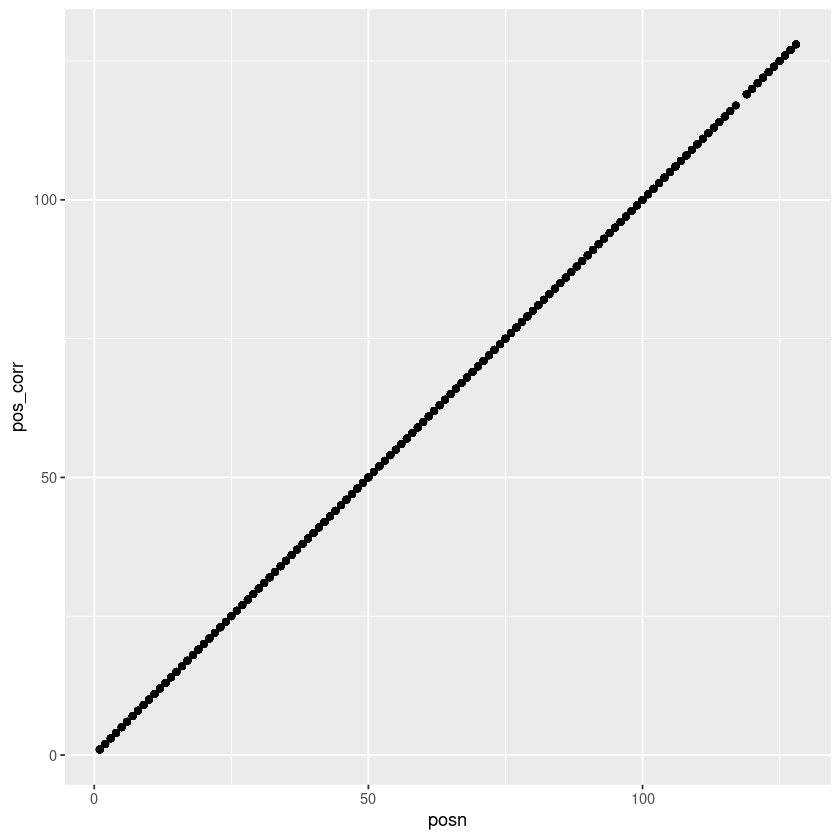

In [27]:
ggplot(gates,aes(posn,pos_corr))+geom_point()

In [28]:
gates_a <- gates[,c(1,15,3,13,14,8)]

head(gates_a)
fileName = paste("scores-replicateA2-",Sys.Date(),".txt",sep="")
fileName

write.table(gates_a,fileName, row.names=F, quote=F,
         col.names=T, sep="\t")

rm(fileName)

orig,pos_corr,new,score,category,totalRow
<chr>,<int>,<chr>,<dbl>,<chr>,<dbl>
M,1,A,0.9344435,missense,1628.624
M,1,C,0.9299419,missense,1641.610
M,1,D,0.9750137,missense,1232.795
M,1,E,0.8963225,missense,1142.154
M,1,F,0.8497856,missense,1315.343
M,1,G,0.9338761,missense,4541.336


[1] "scores-replicateA2-2023-04-26.txt"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  15.98  593.60  941.27 1178.17 1531.29 5984.62       1 

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
Q,96,Q,NA,2.32559,0.02071024,NA,NA,NA,NA,NA,NA,NA,synonymous,96


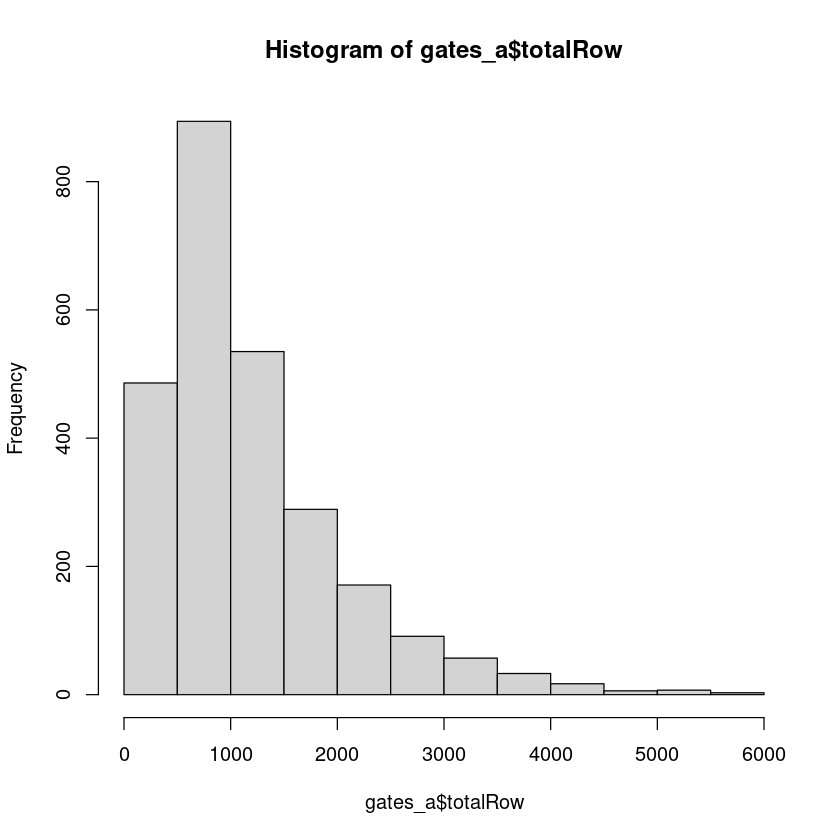

In [86]:
hist(gates_a$totalRow)
summary(gates_a$totalRow)
gates[which(is.na(gates$totalRow)),]

[1] 15

[1] 10

[1] 8

[1] 2

[1] 2590

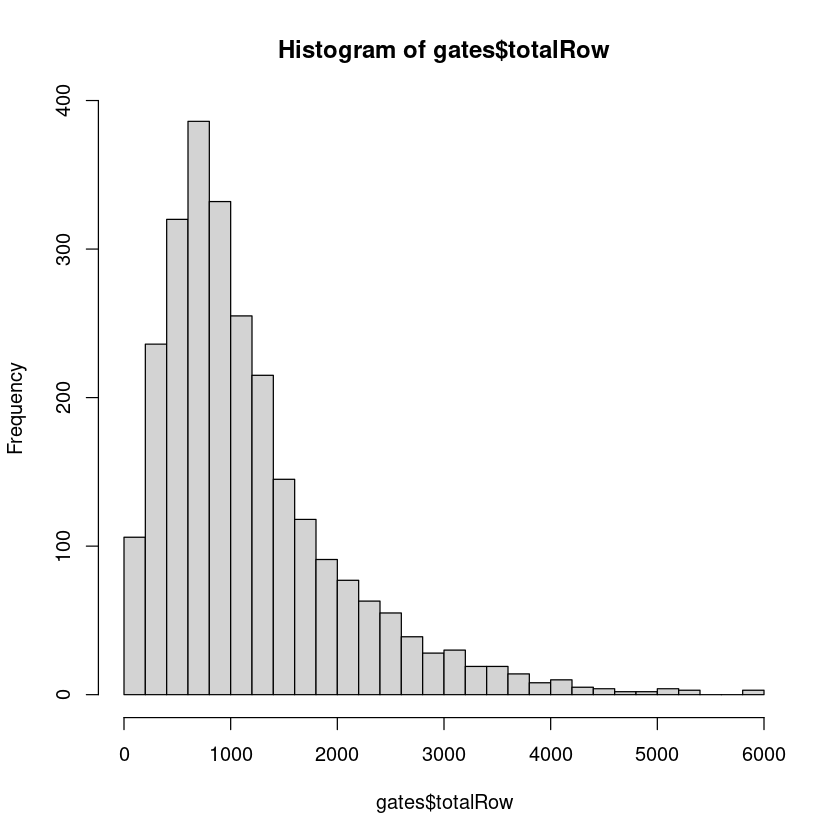

In [87]:
hist(gates$totalRow, breaks = 30)
length(which(gates$totalRow < 50))
length(which(gates$totalRow < 40))
length(which(gates$totalRow < 30))
length(which(gates$totalRow < 20))
nrow(gates)

Next step is thinking about distributions and scoring

* First - plot the scores for synonymous and non-sense variants 
* For all missense variants - I want to highlight the score for known trafficking deficient variants. Starting with L51H.
* I also want to calculate the score for "manual" WT and L51H from our controls. 

for WT 
----

Gate | #of cells | %of total
------ | ----------- | ----- |
Gate 1 | 1,408 cells | 17.0% |
Gate 2 | 2,714 cells | 32.7% |
Gate 3 | 3,302 cells | 39.8% |
Gate 4 | 1,329 cells | 16.0% |


for L51H: 
----
Gate | #of cells | %of total
------ | ----------- | ----- |
Gate 1 | 7,303 cells | 89.0% |
Gate 2 | 824 cells | 10.0% |
Gate 3 | 140 cells | 1.7% |
Gate 4 | 1 cells | 0.0% |




In [88]:
nrow(gates)
# total number of unique mutations = 2284 

head(gates)
pos_51 <- gates[gates$posn =="60",] # because of the HA tag, need to add 9
head(pos_51)
nrow(pos_51)

[1] 2590

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
M,1,A,723.5160,399.4223,394.6232,111.0629,1628.624,0.4442497,0.2452513,0.2423046,0.06819428,0.9344435,missense,1
M,1,C,634.5227,595.7003,303.2600,108.1273,1641.610,0.3865246,0.3628756,0.1847333,0.06586662,0.9299419,missense,1
M,1,D,536.2000,296.1496,295.4937,104.9517,1232.795,0.4349466,0.2402262,0.2396941,0.08513310,0.9750137,missense,1
M,1,E,497.1514,326.4650,258.3395,60.1981,1142.154,0.4352753,0.2858327,0.2261862,0.05270577,0.8963225,missense,1
M,1,F,665.8791,288.8235,252.9859,107.6548,1315.343,0.5062397,0.2195803,0.1923345,0.08184543,0.8497856,missense,1
M,1,G,2049.0389,1175.5166,884.8139,431.9671,4541.336,0.4511973,0.2588482,0.1948356,0.09511894,0.9338761,missense,1


orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
G,60,A,457.7111,578.3089,259.0644,390.4279,1685.5123,0.27155607,0.34310571,0.1537007,0.2316375,1.345420,missense,60
G,60,C,314.6372,264.6025,286.6918,283.8962,1149.8277,0.27363857,0.23012358,0.2493346,0.2469032,1.469503,missense,60
G,60,D,87.8183,112.5015,230.2979,990.0543,1420.6720,0.06181462,0.07918897,0.1621049,0.6968915,2.494073,missense,60
G,60,E,118.5559,172.4797,182.9232,288.3266,762.2854,0.15552690,0.22626658,0.2399668,0.3782397,1.840919,missense,60
G,60,F,201.3296,173.1691,75.8616,106.1367,556.4970,0.36178017,0.31117706,0.1363199,0.1907229,1.155985,missense,60
G,60,G,488.2920,734.5830,707.0993,744.6766,2674.6509,0.18256289,0.27464631,0.2643707,0.2784201,1.638648,synonymous,60


[1] 21

[1] 2590

[1] 2366

[1] 124

[1] 100

[1] 2590

Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
M,1,A,723.5160,399.4223,394.6232,111.0629,1628.624,0.4442497,0.2452513,0.2423046,0.06819428,0.9344435,missense,1
M,1,C,634.5227,595.7003,303.2600,108.1273,1641.610,0.3865246,0.3628756,0.1847333,0.06586662,0.9299419,missense,1
M,1,D,536.2000,296.1496,295.4937,104.9517,1232.795,0.4349466,0.2402262,0.2396941,0.08513310,0.9750137,missense,1
M,1,E,497.1514,326.4650,258.3395,60.1981,1142.154,0.4352753,0.2858327,0.2261862,0.05270577,0.8963225,missense,1
M,1,F,665.8791,288.8235,252.9859,107.6548,1315.343,0.5062397,0.2195803,0.1923345,0.08184543,0.8497856,missense,1
M,1,G,2049.0389,1175.5166,884.8139,431.9671,4541.336,0.4511973,0.2588482,0.1948356,0.09511894,0.9338761,missense,1


orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
I,61,A,114.717602,213.696872,212.124619,62.11124,602.6503,0.19035516,0.354595126,0.35198623,0.1030635,1.367758,missense,61
I,61,C,277.413716,454.602224,644.885764,445.92450,1822.8262,0.15218879,0.249394168,0.35378346,0.2446336,1.690862,missense,61
I,61,D,7.269234,13.015948,9.298897,476.36436,505.9484,0.01436754,0.025725840,0.01837914,0.9415275,2.887067,missense,61
I,61,E,12.188500,1.121431,33.239933,265.64001,312.1899,0.03904195,0.003592143,0.10647345,0.8508925,2.769216,missense,61
I,61,F,286.014598,603.357234,1236.287337,1400.63606,3526.2952,0.08110909,0.171102303,0.35059099,0.3971976,2.063877,missense,61
I,61,G,18.376749,23.890148,130.505568,1255.35353,1428.1260,0.01286774,0.016728320,0.09138239,0.8790216,2.836558,missense,61


[1] 21

Warning message:
“Removed 1 rows containing missing values (geom_point).”


png 
  2

Warning message:
“Removed 1 rows containing missing values (geom_point).”


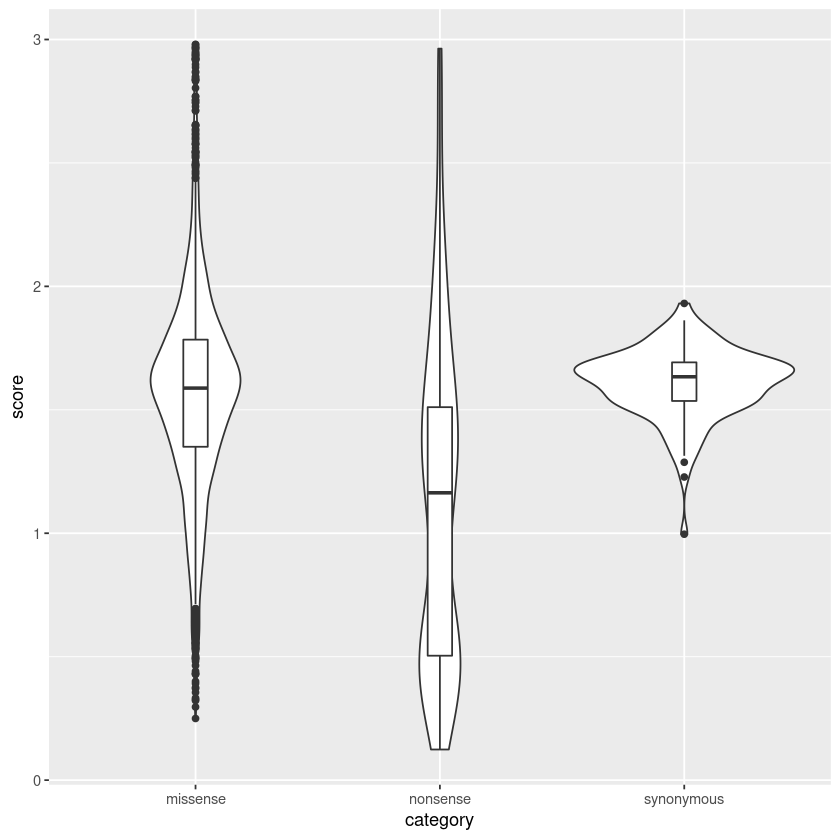

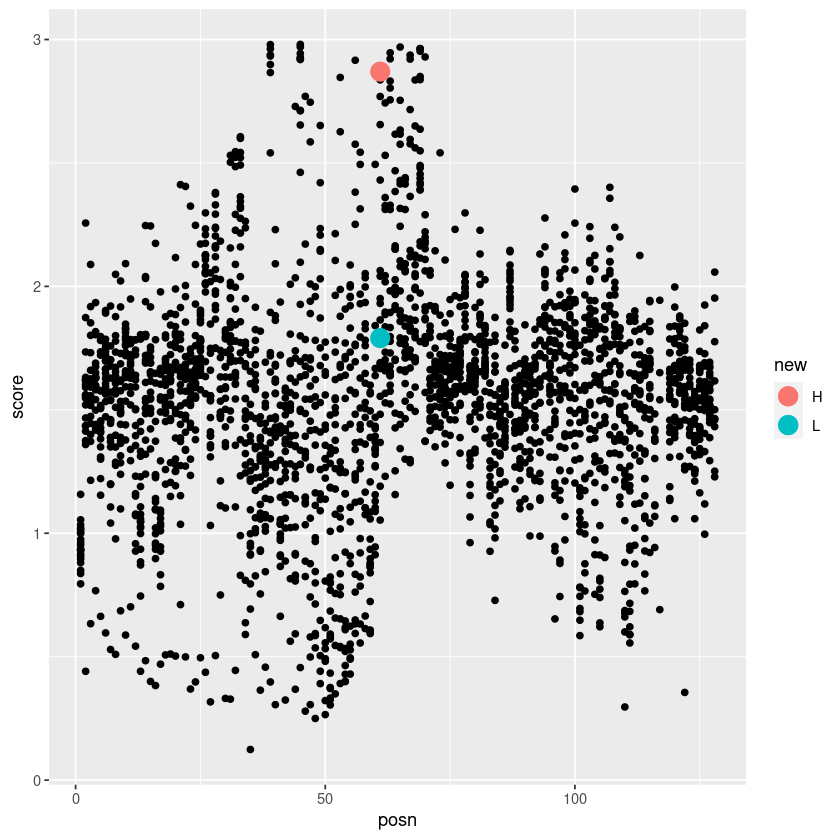

In [90]:
nrow(gates)
nrow(gates[gates$category=="missense" & gates$totalRow >0,])
nrow(gates[gates$category=="nonsense" & gates$totalRow >0,])
nrow(gates[gates$category=="synonymous" & gates$totalRow >0,])
nrow(gates[gates$totalRow >0,])

ggplot(gates,
       aes(category,score))+geom_violin()+geom_boxplot(width=0.1)

#        geom_dotplot(binaxis='y',stackdir='center',dotsize=0.2)


head(gates)
pos_51 <- gates[gates$posn =="61",]
head(pos_51)
nrow(pos_51)

pdf("score_distribution_L51H.pdf", useDingbats = F)
ggplot(gates,
       aes(posn,score))+geom_point()+geom_point(
    data=pos_51[pos_51$new=="H",],aes(color=new))+geom_point(
    data=pos_51[pos_51$new=="L",],aes(color=new))
dev.off()


ggplot(gates,
       aes(posn,score))+geom_point()+geom_point(
    data=pos_51[pos_51$new=="H",],aes(color=new),size =5)+geom_point(
    data=pos_51[pos_51$new=="L",],aes(color=new),size =5)

orig,score
<chr>,<dbl>
M,0.9344435
M,0.9299419
M,0.9750137
M,0.8963225
M,0.8497856
M,0.9338761


,orig,pos_corr,new,score
,<chr>,<int>,<chr>,<dbl>
1,A,8,V,1.564735
2,A,86,T,1.613063
3,A,93,T,1.727081
4,D,91,E,1.598991
5,E,116,A,1.302833
6,E,43,K,1.155459


[1] 45

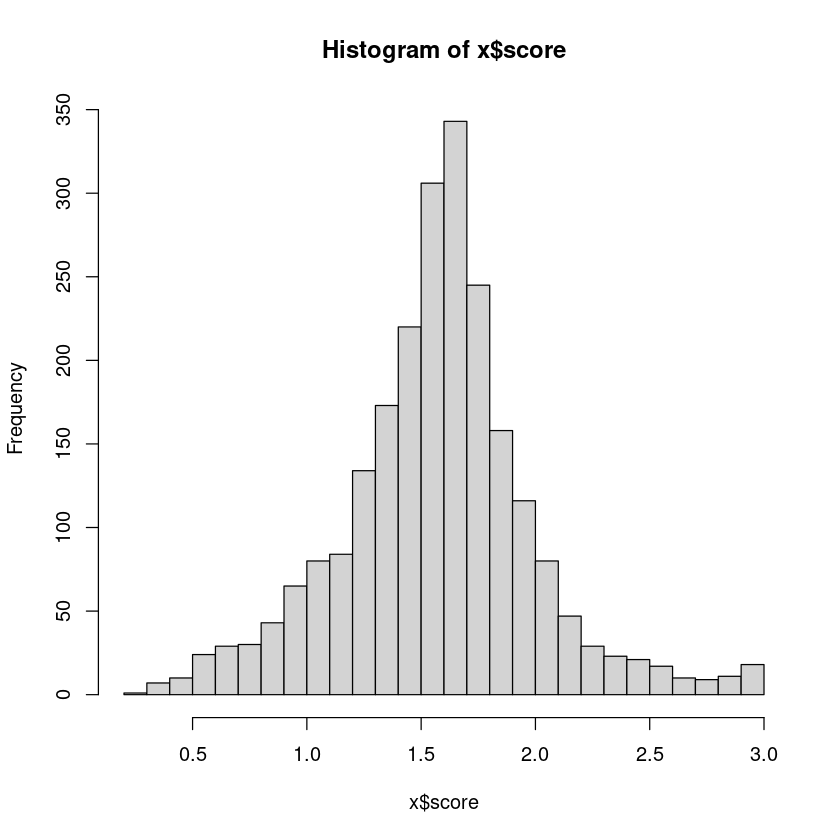

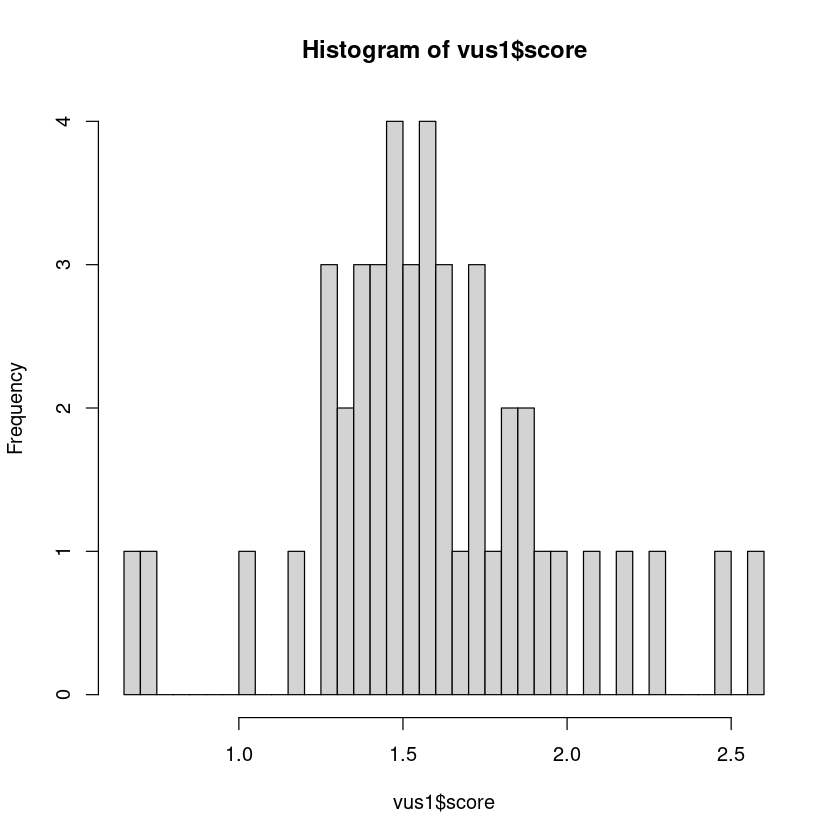

[1] 1.892996

[1] 1.323644

[1] 16

[1] 4

[1] 10

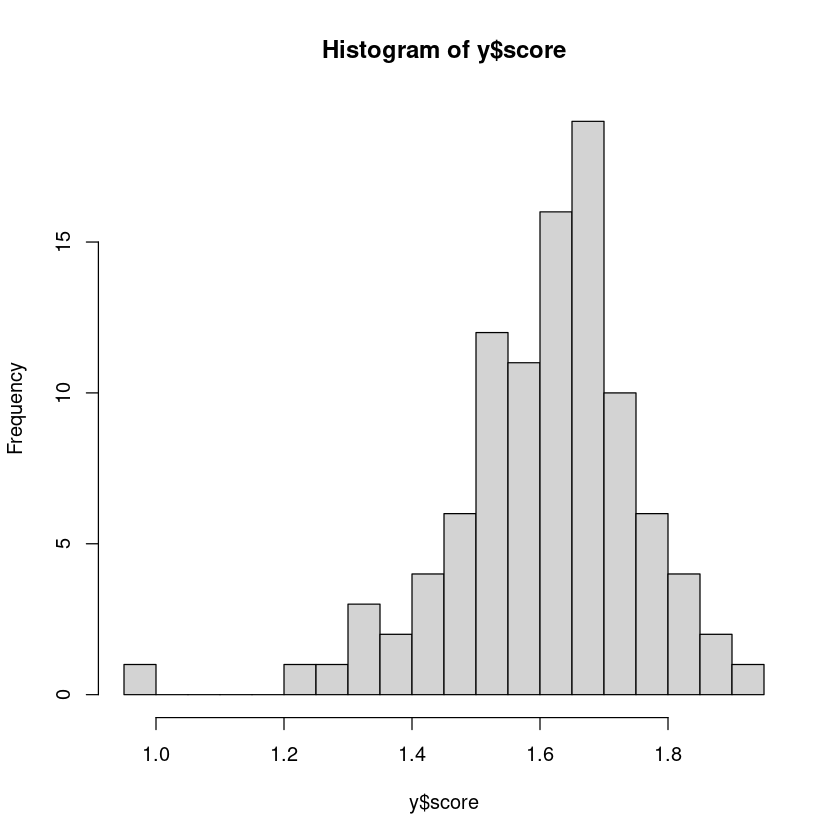

In [91]:
x <- (gates[gates$category=="missense" & gates$totalRow >100,c(1,13)])
head(x)


hist(x$score, breaks=30)

vus = data.frame(mut=c("L48F","M27V","M27T","V95I","K70E","P127L","L71V","P11T",
"A86T","A93T","E116A","G60D","F53L","H112R","S37N","L48I","I2F","R67G",
"T120I","K70Q","R36C","G29D","D91E",
    "E43K","S74W","P11R","S37G","K41N",
    "F53C","R98Q","R98G","V80I","R32C","S37G","R32H","S28L","V109I","E83K",
    "Y81C","A8V","R67H","L59P","T58P","G55S","S74L")) %>% separate(mut,c("orig","pos_corr","new"),
                                                                  sep=c(1,-1),convert = T)




vus1 <- merge(vus,gates,by=c("orig","pos_corr","new")) %>% select("orig","pos_corr","new","score")
conflict <- data.frame(mut =c("S105L","T58I","T125M","T10M","R98W",
"K69R","R67C","R36H","D85N","D76N"))%>% separate(mut,c("orig","pos_corr","new"),
                                                                  sep=c(1,-1),convert = T)
conflict1 <- merge(conflict,gates,by=c("orig","pos_corr","new")) %>% select("orig","pos_corr","new","score")

head(vus1)
nrow(vus1)
hist(vus1$score, breaks=30)

y <- (gates[gates$category=="synonymous" & gates$totalRow >100,c(1,13)])
hist(y$score, breaks = 30)

cutoff1 = mean(y$score, na.rm=T) + 1.96*sd(y$score, na.rm=T)
cutoff2 = mean(y$score, na.rm=T) - 1.96*sd(y$score, na.rm=T)

cutoff1
cutoff2

length(which(vus1$score > cutoff1 | vus1$score<cutoff2))
length(which(conflict1$score > cutoff1 | conflict1$score<cutoff2))
nrow(conflict1)



In [102]:
clinvar <- data.frame("variant"= c("K90X",
"W17X", "W17X", "Y46X", "Y46C", "N5X", "H73Y", "R67L", "Q88X", "T7I", "V47I",
"G40S", "S38G", "S38D", "S38N", "L3P", "S38G"),
                     classification =c("LP","P","P","P","LP","P","LP",
                            "LP","P","P","B","LB","LB","LB","LB","LB","B"))

head(clinvar)
nrow(clinvar)
clinvar_score <- separate(clinvar, variant,into=c("orig","pos_corr","new"),sep=c(1,-1),convert = T)

gates$pos_corr = gates$posn
tail(gates,20)
nrow(gates)

# removing the mutations in the HA tag, there are two of them. 

clinvar <- merge(clinvar_score,gates, by=c("orig","pos_corr","new")) %>%
    select("orig","pos_corr","new","classification","score","category")
head(clinvar)
nrow(clinvar)
clinvar

,variant,classification
,<chr>,<chr>
1,K90X,LP
2,W17X,P
3,W17X,P
4,Y46X,P
5,Y46C,LP
6,N5X,P


[1] 17

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr,cat2
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
P,127,N,47.41452,96.865865,30.433696,76.827714,251.54179,0.1884956,0.38508855,0.12098862,0.30542723,1.543347,missense,127,missense
P,127,P,116.66808,191.470485,93.289270,181.461808,582.88964,0.2001547,0.32848497,0.16004620,0.31131418,1.582520,synonymous,127,synonymous
P,127,Q,209.21765,361.201763,389.300710,215.085067,1174.80519,0.1780871,0.30745673,0.33137469,0.18308148,1.519451,missense,127,missense
P,127,R,471.76390,724.637195,748.644059,730.246682,2675.29183,0.1763411,0.27086286,0.27983641,0.27295963,1.649415,missense,127,missense
P,127,S,370.62128,495.506864,464.509941,552.130934,1882.76902,0.1968490,0.26317985,0.24671637,0.29325474,1.636377,missense,127,missense
P,127,T,191.78088,257.331552,220.439779,195.930421,865.48264,0.2215884,0.29732723,0.25470156,0.22638284,1.485879,missense,127,missense
P,127,V,475.32802,699.644000,700.337428,537.639085,2412.94853,0.1969905,0.28995397,0.29024135,0.22281415,1.538879,missense,127,missense
P,127,W,536.05119,565.633044,533.847820,283.106136,1918.63819,0.2793915,0.29480965,0.27824309,0.14755577,1.293963,missense,127,missense
P,127,X,202.66907,237.476716,164.998471,215.092812,820.23707,0.2470860,0.28952205,0.20115949,0.26223249,1.478539,nonsense,127,latenonsense


[1] 2590

,orig,pos_corr,new,classification,score,category
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>
1,G,40,S,LB,1.8810301,missense
2,H,73,Y,LP,1.4297367,missense
3,K,90,X,LP,1.4606959,nonsense
4,L,3,P,LB,1.5175407,missense
5,N,5,X,P,0.6633199,nonsense
6,Q,88,X,P,1.3439167,nonsense


[1] 13

orig,pos_corr,new,classification,score,category
<chr>,<int>,<chr>,<chr>,<dbl>,<chr>
G,40,S,LB,1.8810301,missense
H,73,Y,LP,1.4297367,missense
K,90,X,LP,1.4606959,nonsense
L,3,P,LB,1.5175407,missense
N,5,X,P,0.6633199,nonsense
Q,88,X,P,1.3439167,nonsense
R,67,L,LP,1.2857487,missense
T,7,I,P,1.4564156,missense
V,47,I,B,1.4162118,missense


In [103]:
clinvar

orig,pos_corr,new,classification,score,category
<chr>,<int>,<chr>,<chr>,<dbl>,<chr>
G,40,S,LB,1.8810301,missense
H,73,Y,LP,1.4297367,missense
K,90,X,LP,1.4606959,nonsense
L,3,P,LB,1.5175407,missense
N,5,X,P,0.6633199,nonsense
Q,88,X,P,1.3439167,nonsense
R,67,L,LP,1.2857487,missense
T,7,I,P,1.4564156,missense
V,47,I,B,1.4162118,missense


Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


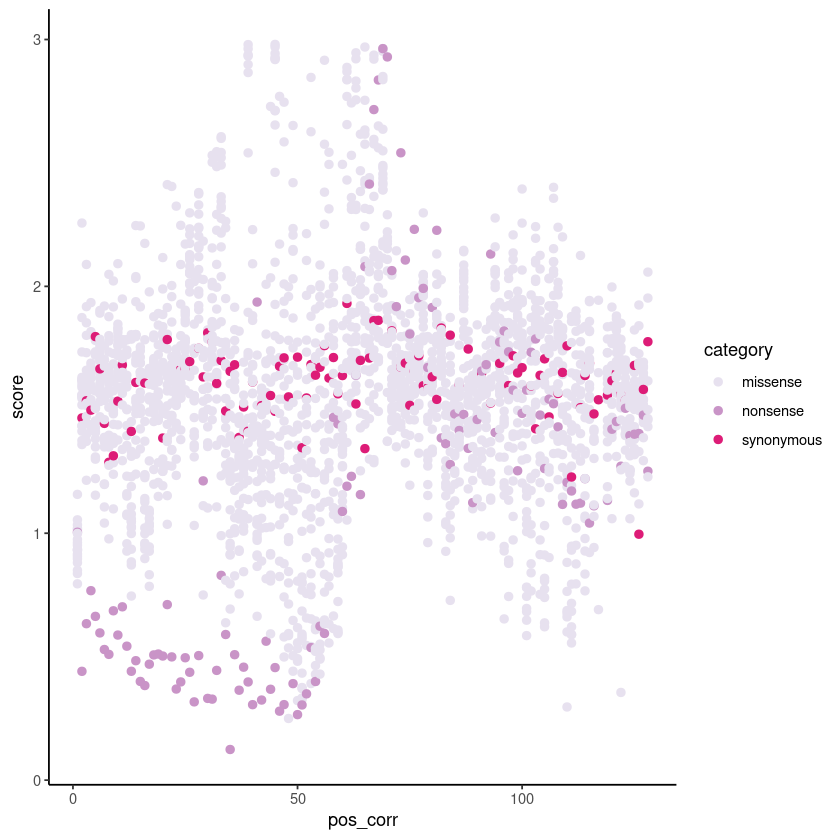

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


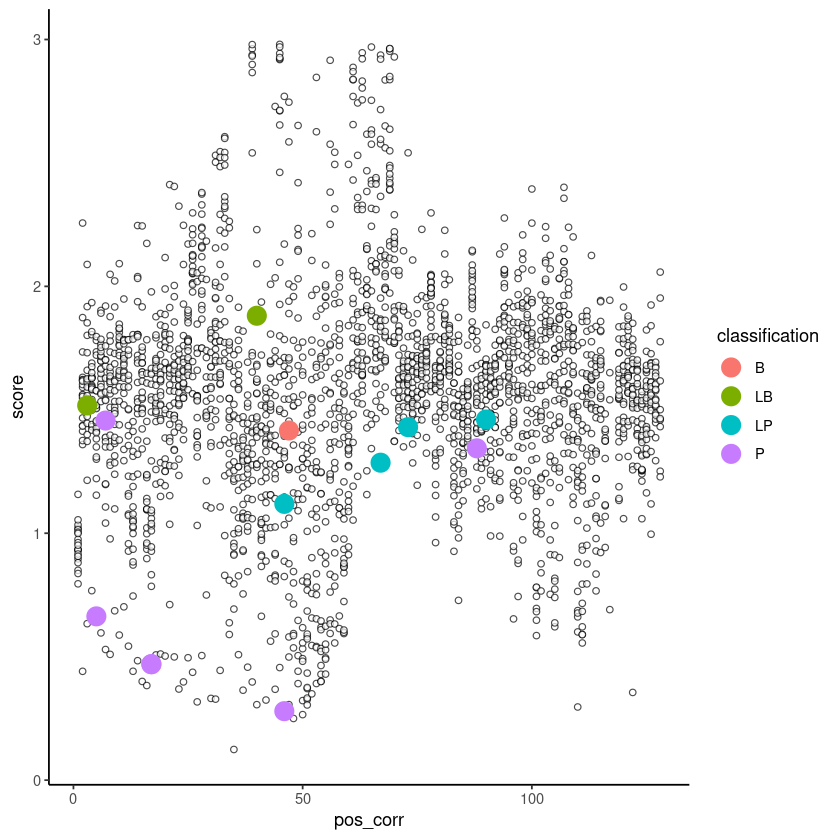

Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


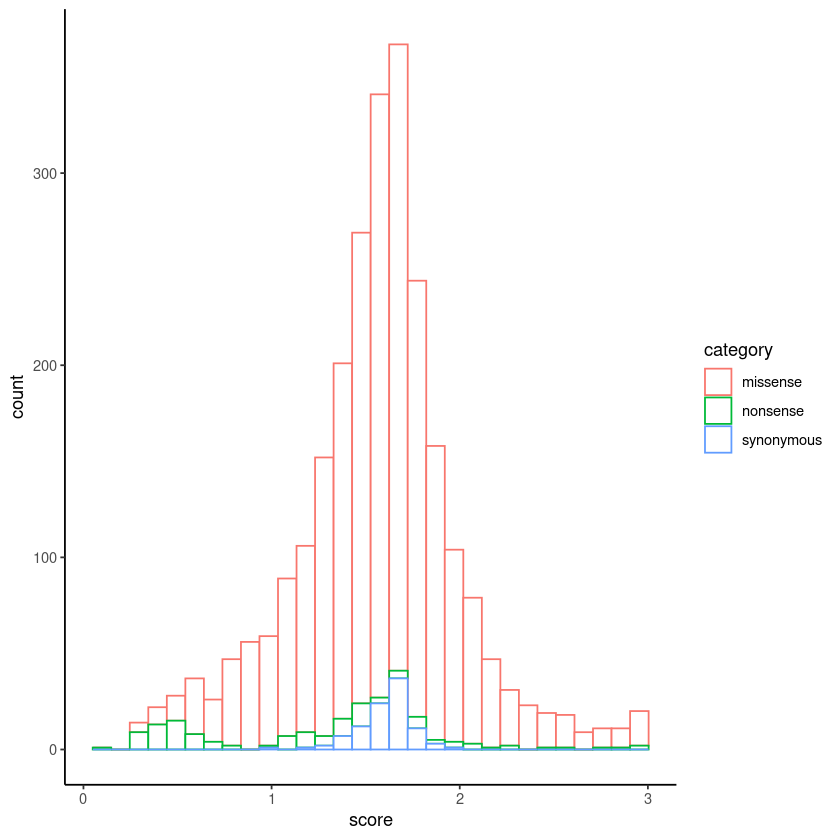

Warning message:
“Removed 1 rows containing missing values (geom_point).”


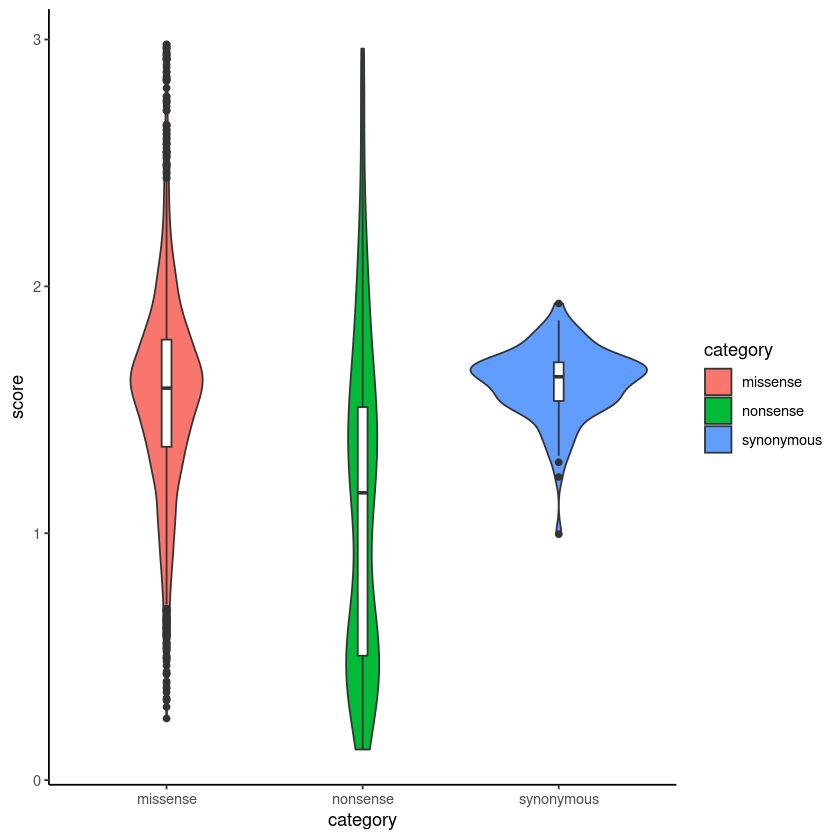

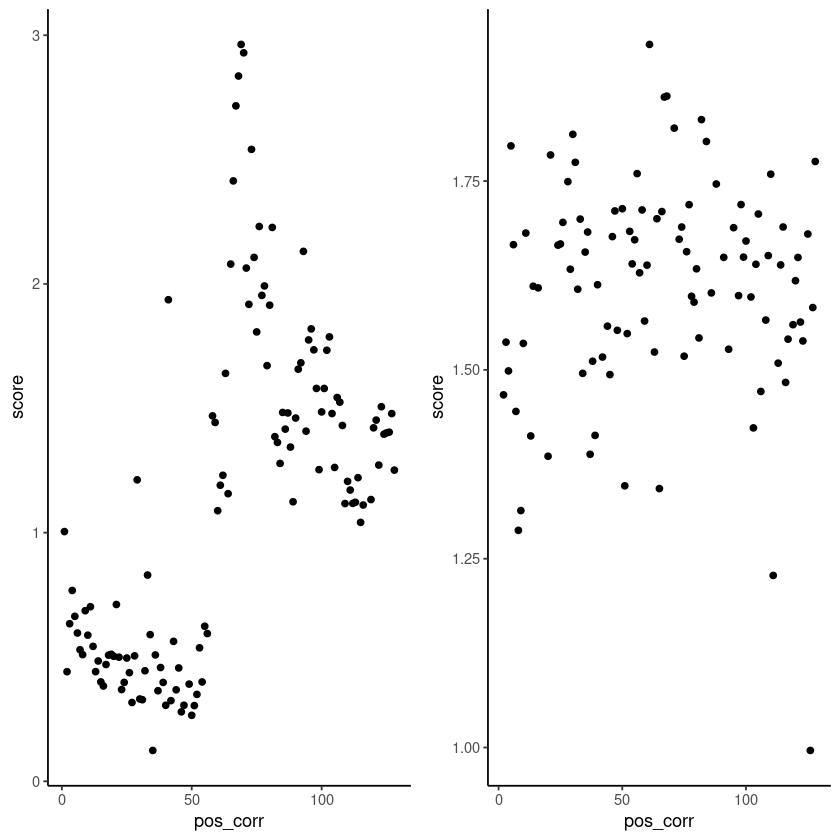

In [104]:
p <- ggplot(gates,aes(pos_corr,score))+theme_classic()

p + geom_point(aes(color=category),size=2,)+scale_color_brewer(palette="PuRd")
        #geom_point(data=clinvar,aes(color=classification))

p+ geom_point(shape=21,fill="white",alpha=0.7)+
    geom_point(data=clinvar,aes(color=classification), size =5)

ggplot(gates,aes(score, color=category))+
    geom_histogram(fill="white")+theme_classic()

ggplot(gates,aes(category,score))+theme_classic()+
    geom_violin(aes(fill=category))+geom_boxplot(width=0.05)

p1 <- ggplot(gates[ gates$category =="nonsense",],aes(pos_corr,score))+
    geom_point()+theme_classic()

p2 <- ggplot(gates[ gates$category =="synonymous",],aes(pos_corr,score))+theme_classic()+
    geom_point()

cowplot::plot_grid(p1,p2)

Warning message:
“Removed 1 rows containing missing values (geom_point).”


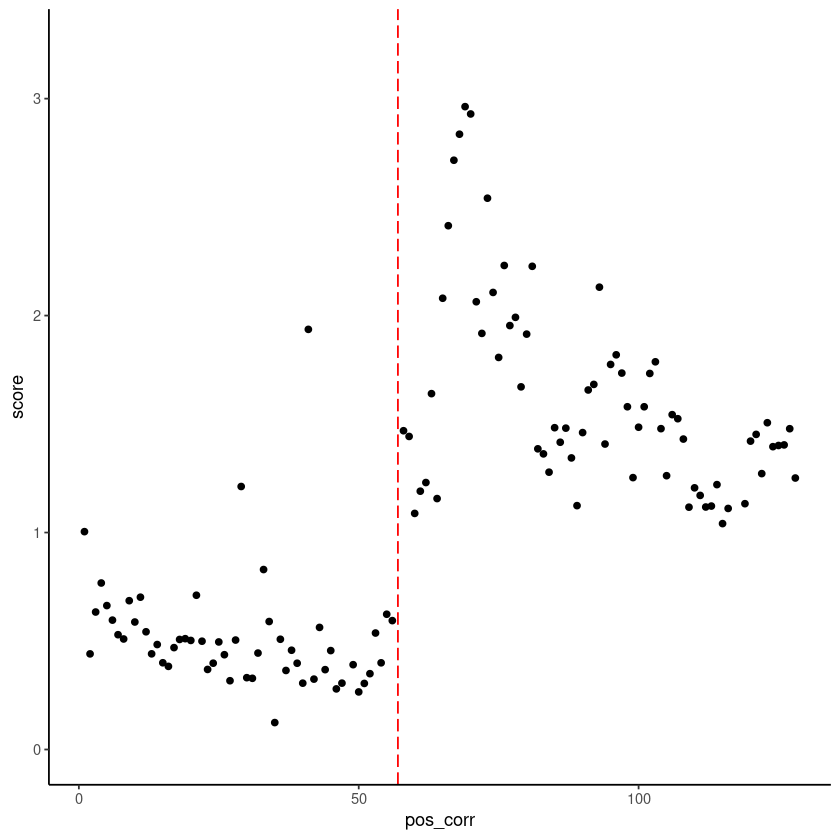

Warning message:
“Removed 1 rows containing missing values (geom_point).”


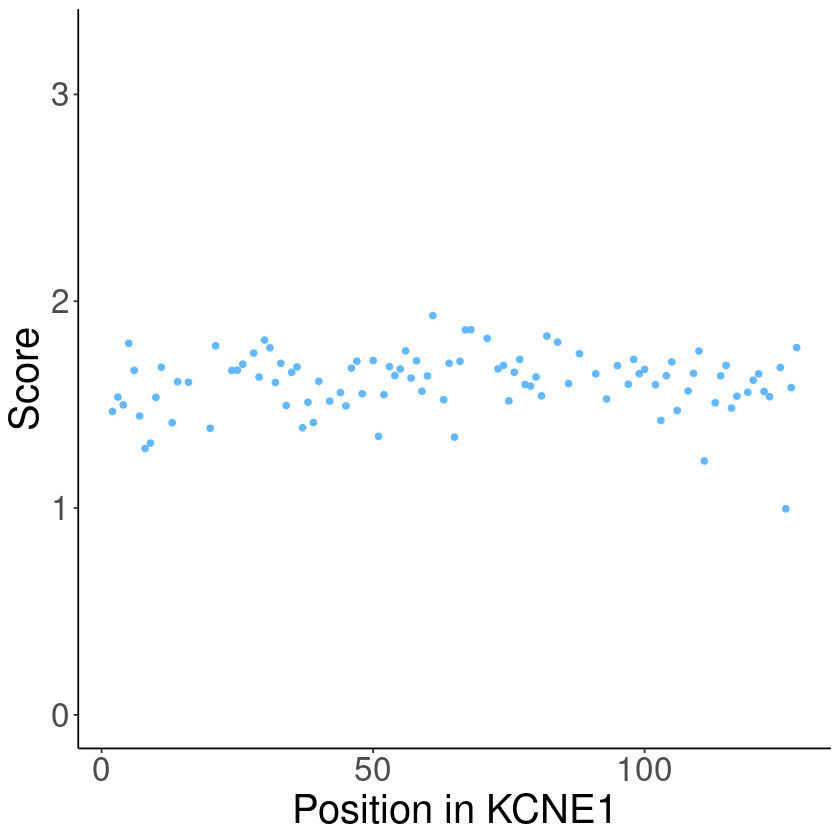

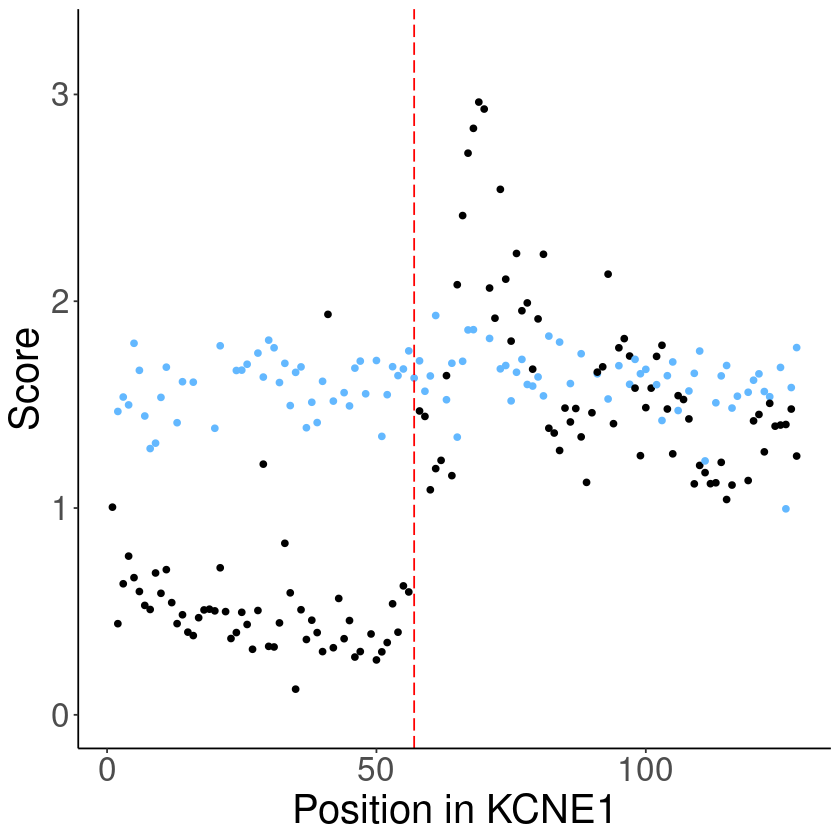

In [105]:
ggplot(gates[gates$category =="nonsense",],aes(pos_corr,score))+
    geom_point(fill="green")+theme_classic()+geom_vline(xintercept=57, lty=5, color="red")+ylim(0,3.25)

ggplot(gates[ gates$category =="synonymous",],aes(pos_corr,score))+theme_classic()+
    geom_point(color="steelblue1")+ylim(0,3.25)+theme(axis.text = element_text(size = 20),
                                               axis.title.x=element_text(size=24),
                                               axis.title.y=element_text(size=24))+
xlab("Position in KCNE1")+ylab("Score")

color_flag = c("black","steelblue1")

ggplot(gates[ gates$category =="synonymous" | gates$category =="nonsense",],
       aes(pos_corr,score, color =category))+
    geom_point()+ylim(0,3.25)+scale_color_manual(values=color_flag)+
theme_classic()+geom_vline(xintercept=57, lty=5, color="red")+xlab("Position in KCNE1")+ylab("Score")+theme(axis.text = element_text(size = 20),
                                               axis.title.x=element_text(size=24),
                                               axis.title.y=element_text(size=24),legend.position = "none")


orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr,cat2
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
M,1,A,723.5160,399.4223,394.6232,111.0629,1628.624,0.4442497,0.2452513,0.2423046,0.06819428,0.9344435,missense,1,missense
M,1,C,634.5227,595.7003,303.2600,108.1273,1641.610,0.3865246,0.3628756,0.1847333,0.06586662,0.9299419,missense,1,missense
M,1,D,536.2000,296.1496,295.4937,104.9517,1232.795,0.4349466,0.2402262,0.2396941,0.08513310,0.9750137,missense,1,missense
M,1,E,497.1514,326.4650,258.3395,60.1981,1142.154,0.4352753,0.2858327,0.2261862,0.05270577,0.8963225,missense,1,missense
M,1,F,665.8791,288.8235,252.9859,107.6548,1315.343,0.5062397,0.2195803,0.1923345,0.08184543,0.8497856,missense,1,missense
M,1,G,2049.0389,1175.5166,884.8139,431.9671,4541.336,0.4511973,0.2588482,0.1948356,0.09511894,0.9338761,missense,1,missense


Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


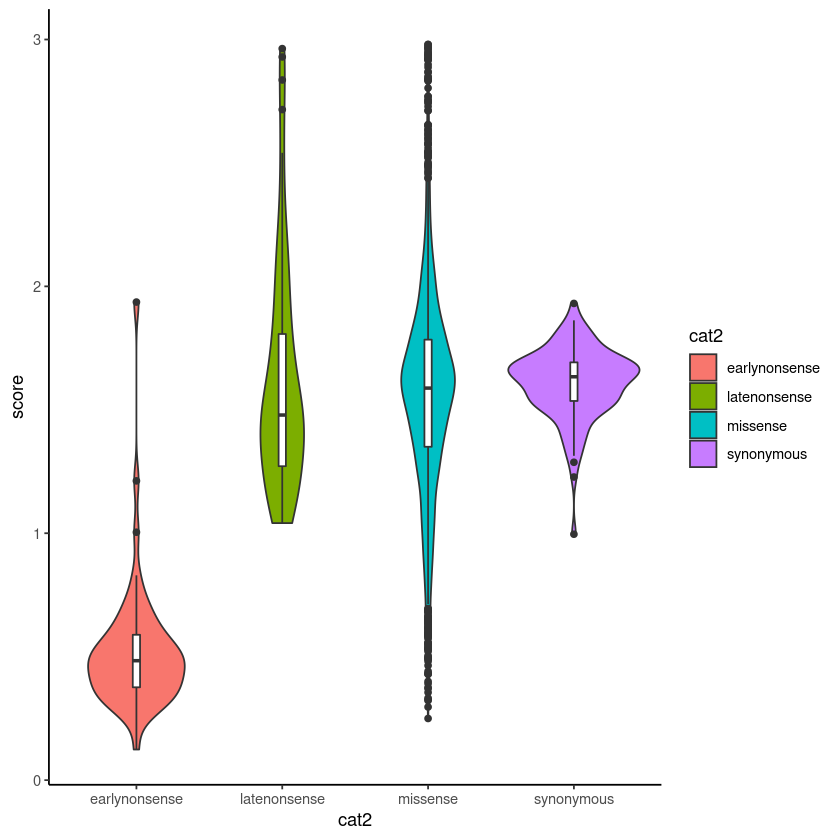

In [106]:
# early vs late nonsense 
gates$cat2 = ifelse((gates$category !="nonsense"),gates$category,ifelse(gates$pos_corr>57,"latenonsense","earlynonsense"))
head(gates)
ggplot(gates,aes(cat2,score))+theme_classic()+
    geom_violin(aes(fill=cat2))+geom_boxplot(width=0.05)

In [107]:
ns1 <- gates[gates$category =="nonsense",]

head(ns1)

wilcox.test(ns1$score~ns1$cat2)

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr,cat2
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
M,1,X,526.9176,279.2822,332.8550,99.59177,1238.6465,0.4253979,0.2254737,0.26872473,0.08040370,1.0041342,nonsense,1,earlynonsense
I,2,X,949.6064,206.9959,115.7806,47.74332,1320.1262,0.7193300,0.1568001,0.08770419,0.03616573,0.4407056,nonsense,2,earlynonsense
L,3,X,1256.4809,488.6496,251.3498,115.67919,2112.1595,0.5948797,0.2313507,0.11900134,0.05476821,0.6336580,nonsense,3,earlynonsense
S,4,X,662.6988,399.1190,214.9930,67.48663,1344.2974,0.4929704,0.2968978,0.15992963,0.05020216,0.7673636,nonsense,4,earlynonsense
N,5,X,515.4655,186.2770,127.6372,46.47306,875.8527,0.5885299,0.2126807,0.14572907,0.05306036,0.6633199,nonsense,5,earlynonsense
T,6,X,603.4874,236.9528,102.8367,49.85010,993.1270,0.6076639,0.2385926,0.10354838,0.05019509,0.5962747,nonsense,6,earlynonsense



	Wilcoxon rank sum test with continuity correction

data:  ns1$score by ns1$cat2
W = 67, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [108]:
head(gates)
gates[gates$category=="nonsense" & gates$score > 1.5,c(1:3,8,13:15)]
nrow(gates[gates$category=="nonsense" & gates$score > 1.5,c(1:3,8,13:15)])
nrow(gates[gates$category=="nonsense",])

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr,cat2
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
M,1,A,723.5160,399.4223,394.6232,111.0629,1628.624,0.4442497,0.2452513,0.2423046,0.06819428,0.9344435,missense,1,missense
M,1,C,634.5227,595.7003,303.2600,108.1273,1641.610,0.3865246,0.3628756,0.1847333,0.06586662,0.9299419,missense,1,missense
M,1,D,536.2000,296.1496,295.4937,104.9517,1232.795,0.4349466,0.2402262,0.2396941,0.08513310,0.9750137,missense,1,missense
M,1,E,497.1514,326.4650,258.3395,60.1981,1142.154,0.4352753,0.2858327,0.2261862,0.05270577,0.8963225,missense,1,missense
M,1,F,665.8791,288.8235,252.9859,107.6548,1315.343,0.5062397,0.2195803,0.1923345,0.08184543,0.8497856,missense,1,missense
M,1,G,2049.0389,1175.5166,884.8139,431.9671,4541.336,0.4511973,0.2588482,0.1948356,0.09511894,0.9338761,missense,1,missense


orig,posn,new,totalRow,score,category,pos_corr
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>
K,41,X,41.19713,1.936431,nonsense,41
L,63,X,379.82983,1.640226,nonsense,63
Y,65,X,1138.77239,2.079889,nonsense,65
I,66,X,537.20876,2.414258,nonsense,66
R,67,X,107.15123,2.716032,nonsense,67
S,68,X,582.32638,2.835980,nonsense,68
K,69,X,683.42910,2.963019,nonsense,69
K,70,X,231.18022,2.929319,nonsense,70
L,71,X,1168.52908,2.063745,nonsense,71


[1] 32

[1] 124

In order to make the heatmap, need to have a matrix of the following format

A | R | N | D | C | E | Q |
--|---|---|---|---|---|---|
2 | 13| 0 |1|0| 3| 0|
2| 11| 1| 2| 2| 2| 1|

where the columns are all the amino acids possible (including WT) and the rows are positions, and the actual numbers are the scores.
Q: should they be normalized for synonymous score at each position

In [121]:
gates_for_hm <- gates %>% ungroup() %>% select(orig,pos_corr,new, score, category, cat2) 
head(gates_for_hm)

amino_acids <- c("G","A","V","L","M","I","F","Y","W","S","T","C","P","N","Q","K","R","H",
                 "D","E")

heatmap_matrix = matrix(rep(0,2688), ncol=21,nrow=128)
 colnames(heatmap_matrix)= c("G","A","V","L","M","I","F","Y","W","S","T","C","P","N","Q","K","R","H",
                 "D","E","X")

head(heatmap_matrix)
tail(gates_for_hm)
gates[gates$pos_corr==38,]

orig,pos_corr,new,score,category,cat2
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
M,1,A,0.9344435,missense,missense
M,1,C,0.9299419,missense,missense
M,1,D,0.9750137,missense,missense
M,1,E,0.8963225,missense,missense
M,1,F,0.8497856,missense,missense
M,1,G,0.9338761,missense,missense


G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


orig,pos_corr,new,score,category,cat2
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
S,128,P,1.500607,missense,missense
S,128,S,1.775866,synonymous,synonymous
S,128,T,1.952616,missense,missense
S,128,W,1.431807,missense,missense
S,128,X,1.251288,nonsense,latenonsense
S,128,Y,1.228453,missense,missense


orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr,cat2
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
G,38,A,144.42120,227.68718,240.64262,100.13395,712.8849,0.2025870,0.3193884,0.33756165,0.14046299,1.4159007,missense,38,missense
G,38,C,586.30917,280.55987,239.07899,179.10717,1285.0552,0.4562521,0.2183252,0.18604570,0.13937703,1.0085476,missense,38,missense
G,38,D,188.24810,223.36691,111.86635,126.09690,649.5783,0.2898005,0.3438645,0.17221382,0.19412118,1.2706557,missense,38,missense
G,38,E,133.60351,161.94561,82.28178,95.39370,473.2246,0.2823258,0.3422172,0.17387469,0.20158230,1.2947135,missense,38,missense
G,38,F,486.86636,387.61973,289.18742,148.08641,1311.7599,0.3711551,0.2954959,0.22045758,0.11289139,1.0750853,missense,38,missense
G,38,G,189.10192,228.62477,216.86726,199.36943,833.9634,0.2267509,0.2741425,0.26004411,0.23906257,1.5114184,synonymous,38,synonymous
G,38,H,179.02839,224.81007,114.48620,107.40699,625.7316,0.2861105,0.3592755,0.18296374,0.17165024,1.2401537,missense,38,missense
G,38,I,220.63066,230.65621,159.93482,79.12038,690.3421,0.3195961,0.3341187,0.23167474,0.11461041,1.1412994,missense,38,missense
G,38,K,70.24054,75.61384,51.93092,40.14498,237.9303,0.2952148,0.3177983,0.21826109,0.16872581,1.2604979,missense,38,missense


In [110]:
colnames(heatmap_matrix)

[1] "G" "A" "V" "L" "M" "I" "F" "Y" "W" "S" "T" "C" "P" "N" "Q" "K" "R" "H" "D"
[20] "E" "X"

In [122]:
for (i in c(1:128)){
    for (x1 in (1:21)){
      a = colnames(heatmap_matrix)[x1]
      scoreAA <- gates_for_hm[gates_for_hm$pos_corr==i & gates_for_hm$new==a, 4]
      #print(paste(i,x1,scoreAA, sep=" "))
        # this print is working correctly
        heatmap_matrix[i,x1] <- as.numeric(scoreAA)
        #<- scoreAA
    }
  }

G,A,V,L,M,I,F,Y,W,S,...,C,P,N,Q,K,R,H,D,E,X
0.9338761,0.9344435,1.014609,0.9514582,NA,0.9158913,0.8497856,0.9992395,1.054361,0.880691,...,0.9299419,0.9067936,1.020414,1.157462,0.8368953,1.033849,0.9618917,0.9750137,0.8963225,1.0041342
1.6022620,1.5467061,1.873515,1.6313947,1.561121,1.4669252,1.7343248,1.4342085,1.616338,1.519830,...,2.2565071,1.4359185,1.622385,1.620309,1.4133949,1.375422,1.3592644,1.5911904,1.5592346,0.4407056
1.6120241,1.5458830,1.526195,1.5366663,1.214533,1.5571888,1.7312994,1.8015989,1.917922,1.625363,...,2.0887250,1.5175407,1.473218,1.852297,1.4450797,1.592165,1.3720530,1.6202941,1.3996066,0.6336580
1.5945297,1.6287647,1.584133,1.5810207,1.440411,1.6741847,1.6314352,1.4177966,1.650296,1.498620,...,1.9341974,1.6275747,1.804304,1.590083,1.4316237,1.541467,1.6335928,1.6890084,1.5994032,0.7673636
1.4128769,1.2999814,1.407450,1.5051098,1.721394,1.1541020,1.3823126,1.5175985,1.221415,1.455168,...,1.5088746,1.4274543,1.796550,1.448713,1.7810385,1.577512,1.7347215,1.3496662,1.3090180,0.6633199
1.6272211,1.5688350,1.735605,1.7856496,1.719250,1.5637285,1.6060970,1.7526661,1.471789,1.647082,...,1.9023383,1.5931937,1.891625,1.533351,1.7157701,1.664569,1.6977027,1.6982980,1.7652979,0.5962747


[1] "matrix" "array"

png 
  2

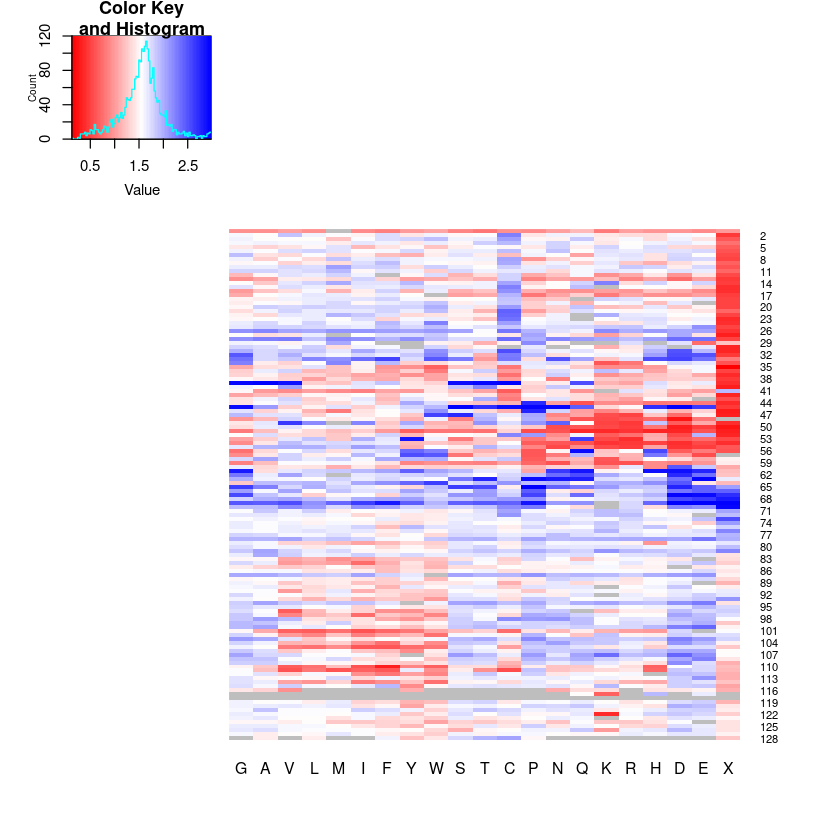

In [123]:
head(heatmap_matrix)
class(heatmap_matrix)
my_palette <- colorRampPalette(c("red","white","blue"))(n=100)

heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="white",
          sepwidth=c(0.05,0.05),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "gray", col = my_palette
        )

pdf("heatmapE1_unscaled.pdf",useDingbats = F)
heatmap.2(heatmap_matrix, Rowv=NA, Colv=NA, 
        scale="none",
         sepcolor="white",
          sepwidth=c(0.05,0.05),
          trace="none", dendrogram = c("none"),
        srtCol=0, adjCol = c(0.5,1), na.color = "gray", col = my_palette
        )

dev.off()

In [124]:
gates[!complete.cases(gates),]

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr,cat2
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>
Q,96,Q,NA,2.32559,0.02071024,NA,NA,NA,NA,NA,NA,NA,synonymous,96,synonymous


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”


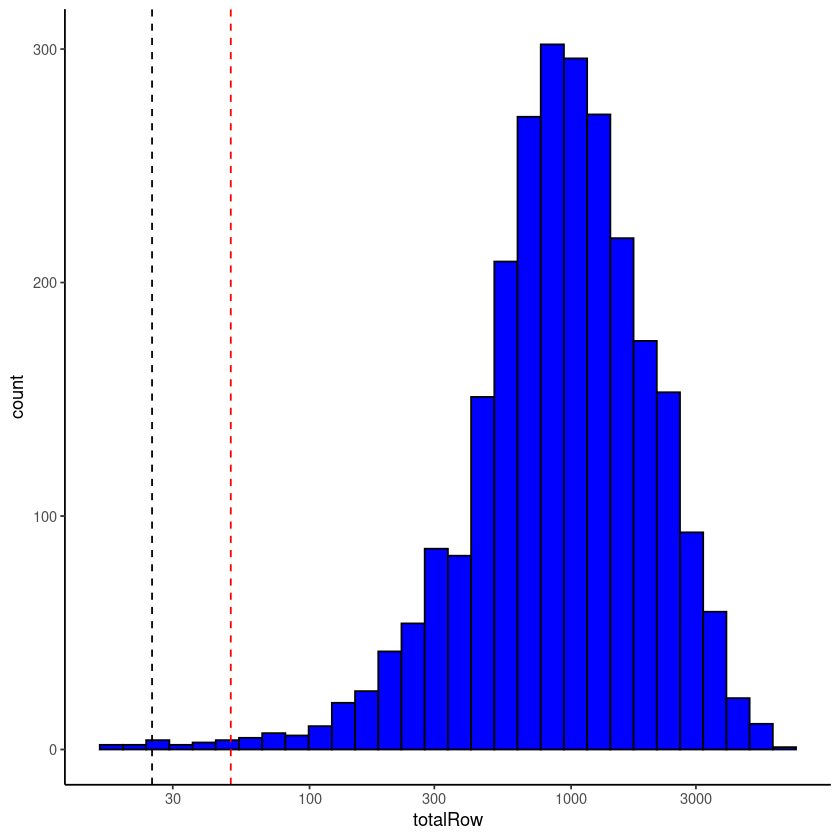

In [125]:
ggplot(gates,aes(totalRow))+geom_histogram(color="black",fill="blue")+
    scale_x_log10()+theme_classic()+
        geom_vline(xintercept = 25, lty=2)+geom_vline(xintercept = 50, lty=2, color="red")

Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


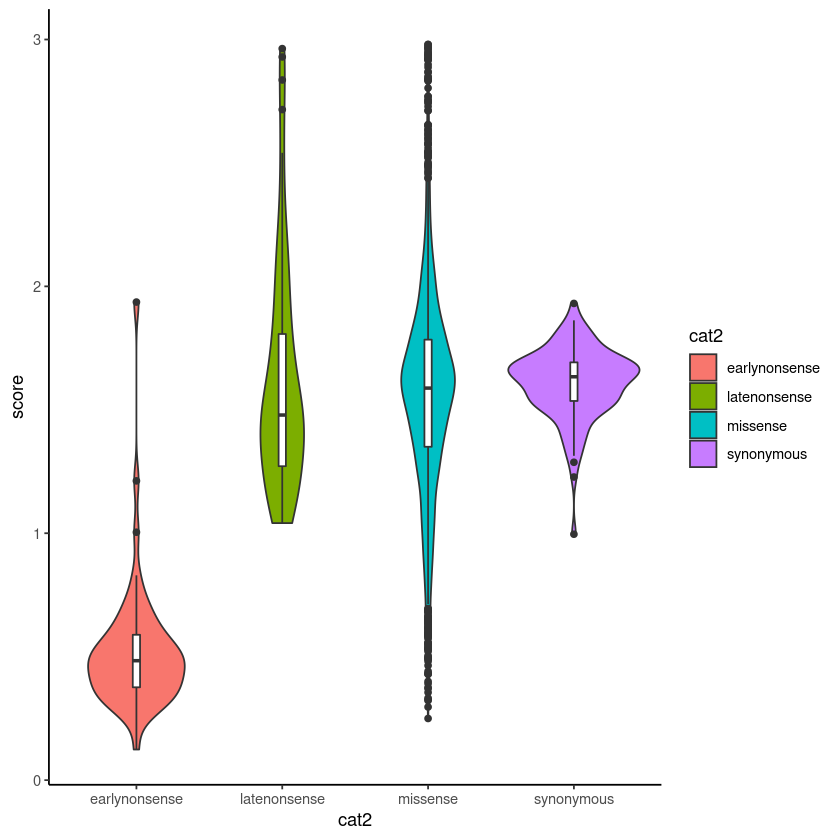

In [126]:

ggplot(gates_for_hm,aes(cat2,score))+theme_classic()+
    geom_violin(aes(fill=cat2))+geom_boxplot(width=0.05)

In [128]:
gates_for_hm$variant= paste(gates_for_hm$orig,gates_for_hm$pos_corr,gates_for_hm$new,sep="")

head(gates_for_hm)

fileName = paste("scores-replicateA2-",Sys.Date(),".txt",sep="")
fileName

write.table(gates_for_hm,fileName, row.names=F, quote=F,
         col.names=T, sep="\t")

rm(fileName)


orig,pos_corr,new,score,category,cat2,variant
<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
M,1,A,0.9344435,missense,missense,M1A
M,1,C,0.9299419,missense,missense,M1C
M,1,D,0.9750137,missense,missense,M1D
M,1,E,0.8963225,missense,missense,M1E
M,1,F,0.8497856,missense,missense,M1F
M,1,G,0.9338761,missense,missense,M1G


[1] "scores-replicateA2-2022-07-06.txt"

I will now overlay the barcodes that are WT (so not synomous mutations, but no mutation) onto the distribution
<b> Of Note, Matreyek et al combined all the WT barcodes together, per replicate, so I am going to try and replicate that too, because the distribution is very wide. 

[1] "Number of total rows"


[1] 116

mutn,barcode,norm.count.G1,norm.count.G2,norm.count.G3,norm.count.G4,origAA,pos,newAA,mutCat,binCount,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wt,AACACTACTCTTCGGCTA,64.74945,37.75177,56.404335,50.41552,NA,NA,NA,wt,209.3211,209.3211,0.3093308,0.1803534,0.26946324,0.24085260,1.4418377
wt,AAGCTCCCAAAGCTGACG,220.90482,43.99317,3.241152,4.86418,NA,NA,NA,wt,273.0033,273.0033,0.8091653,0.1611452,0.01187221,0.01781729,0.2383415
wt,AAGTTCGGACAGATGGTG,83.52569,76.89153,49.808124,44.44374,NA,NA,NA,wt,254.6691,254.6691,0.3279774,0.3019272,0.19557978,0.17451563,1.2166337
wt,ACAGCTTTCTCTGCGAAA,99.75614,42.95447,54.053723,24.29766,NA,NA,NA,wt,221.0620,221.0620,0.4512587,0.1943096,0.24451839,0.10991335,1.0130864
wt,ACCAACTTGATTGTCAAT,17.60126,24.58874,125.359074,46.44982,NA,NA,NA,wt,213.9989,213.9989,0.0822493,0.1149013,0.58579307,0.21705636,1.9376565
wt,ACCATGCGACTAGATTGG,82.62487,26.52827,48.420538,43.08053,NA,NA,NA,wt,200.6542,200.6542,0.4117774,0.1322089,0.24131335,0.21470034,1.2589366


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



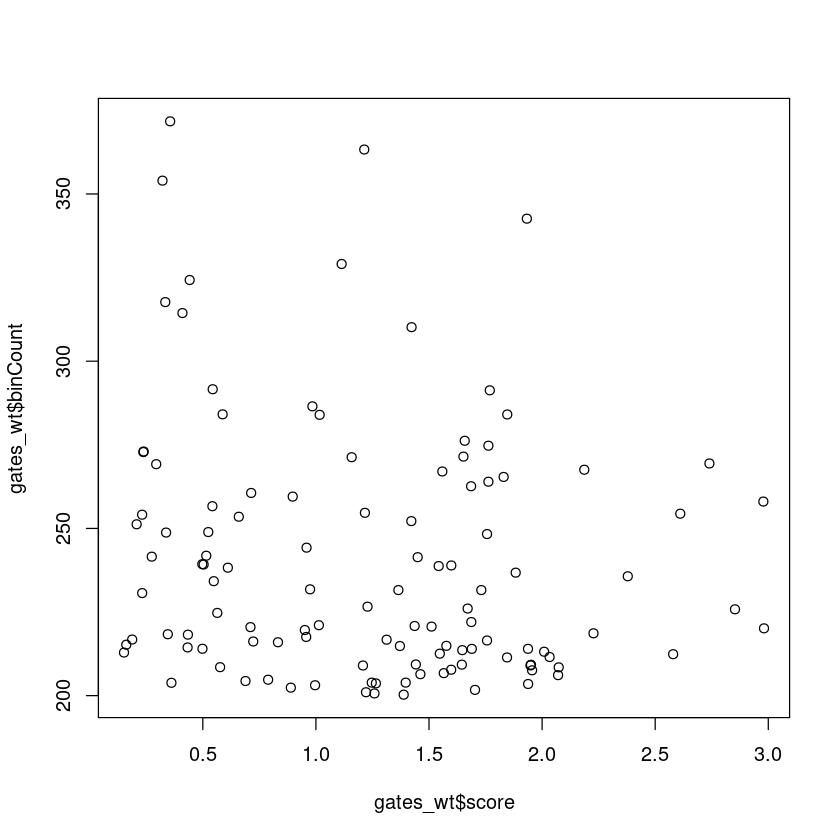

[1] 1.238956

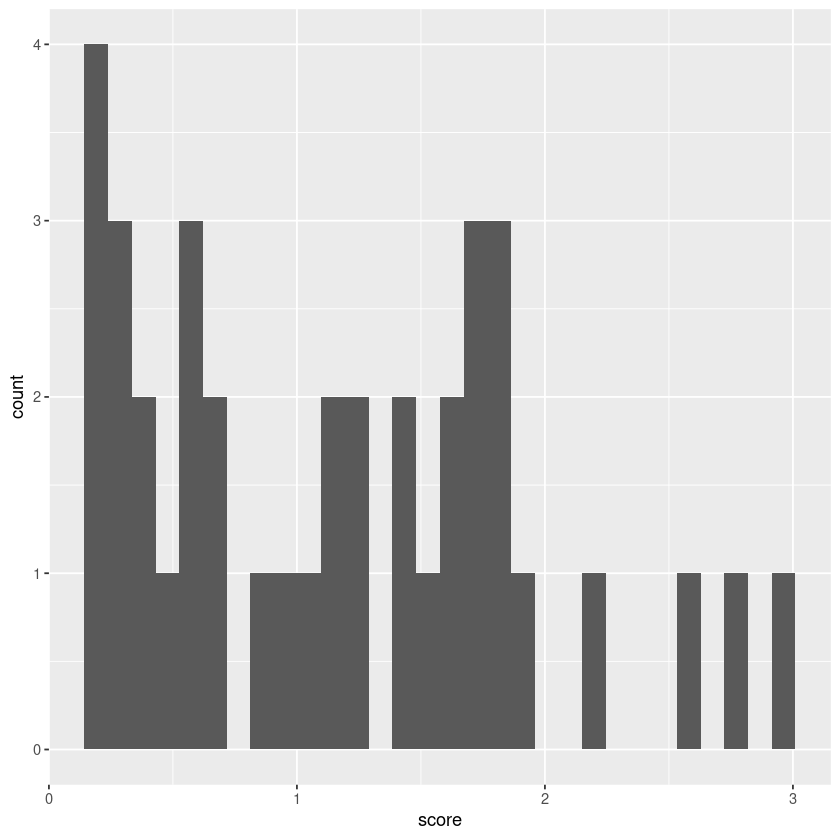

In [69]:
print("Number of total rows")
nrow(fulldf_withWT_short_QC)

gates_wt <- fulldf_withWT_short_QC

gates_wt <- gates_wt %>%
    mutate(norm.G1.ratio = norm.count.G1/binCount,
           norm.G2.ratio = norm.count.G2/binCount,
           norm.G3.ratio = norm.count.G3/binCount,
           norm.G4.ratio = norm.count.G4/binCount,
           score = 0*norm.G1.ratio + 1*norm.G2.ratio +2*norm.G3.ratio +3*norm.G4.ratio,
           .keep="all")

head(gates_wt)

plot(gates_wt$score, gates_wt$binCount)
ggplot(gates_wt[gates_wt$binCount>250,],aes(score))+geom_histogram()

In [71]:
sum(gates_wt$binCount)
mean(gates_wt$score)


[1] 27876.56

[1] 1.238956

The mean of WT scores is 1.23 (comparable to the Synonymous range).

The total bin count for WT is >27e5 (so compared to Matreyek, at 1e-1).

### update 072721 
Talked to Andrew and Dan, and they would like to normalize to synonymous (median of that distribution is 0) and early nonsenses.

Before do that, need to recreate Supp Fig 10 from the Matreyek paper

orig,posn,new,gate1,gate2,gate3,gate4,totalRow,norm.G1.ratio,norm.G2.ratio,norm.G3.ratio,norm.G4.ratio,score,category,pos_corr,cat2
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
I,2,I,34.724693,29.80064,21.714685,22.686599,108.92662,0.3187898,0.2735845,0.1993515,0.20827415,1.2971100,synonymous,2,synonymous
L,3,L,2268.149891,2205.97347,1774.950287,1619.167882,7868.24153,0.2882664,0.2803642,0.2255841,0.20578523,1.3488881,synonymous,3,synonymous
S,4,S,14.773465,15.70922,62.286043,35.652582,128.42131,0.1150390,0.1223257,0.4850133,0.27762201,1.9252183,synonymous,4,synonymous
N,5,N,5.890586,16.18721,34.275445,1.037898,57.39114,0.1026393,0.2820506,0.5972254,0.01808465,1.5307554,synonymous,5,synonymous
T,6,T,135.397320,69.18859,35.165985,51.732261,291.48416,0.4645100,0.2373666,0.1206446,0.17747881,1.0110922,synonymous,6,synonymous
T,7,T,27.706122,21.58294,9.174636,2.803875,61.26758,0.4522151,0.3522735,0.1497470,0.04576441,0.7890607,synonymous,7,synonymous


[1] 97

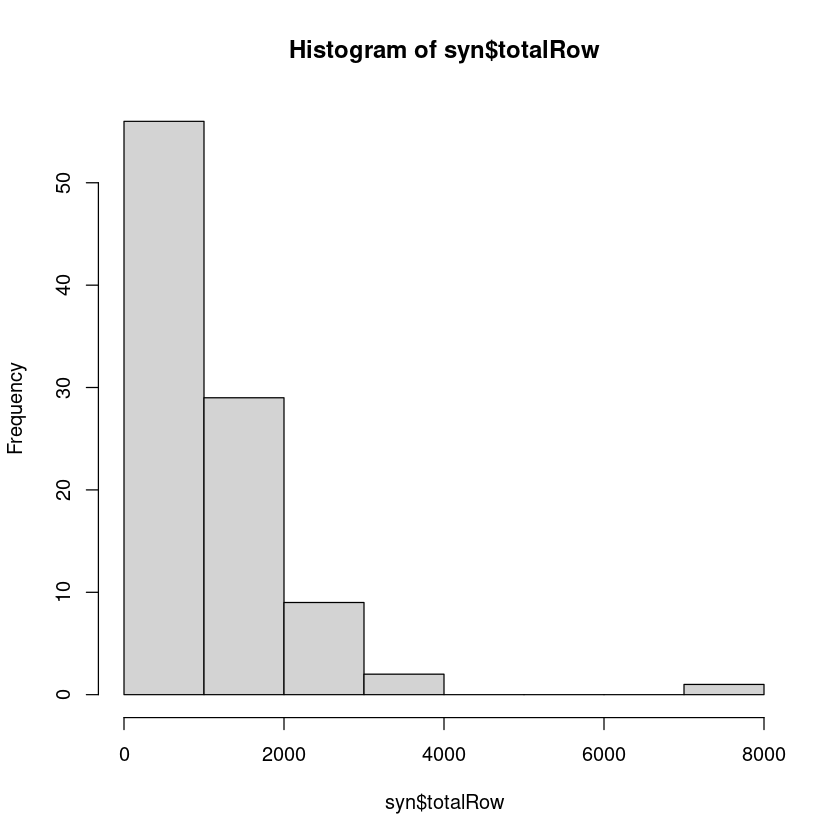

In [144]:
syn <- gates[gates$category =="synonymous",]

syn <- syn[complete.cases(syn$score),]
# there are two synymous variants that have NAs in some gates --> skipping them for now. 
head(syn)

nrow(syn)

hist(syn$totalRow)

missense <- gates[gates$category =="missense",]

,cutoff,synonymous,cv,missense,mean_syn,median_syn
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,97,0.15817795,2063,1.555140,1.623483
2,10,97,0.15817795,2037,1.555140,1.623483
3,20,97,0.15817795,2001,1.555140,1.623483
4,30,96,0.15467031,1972,1.560566,1.624863
5,40,96,0.15467031,1944,1.560566,1.624863
6,50,96,0.15467031,1917,1.560566,1.624863
7,60,95,0.15544698,1893,1.560880,1.626242
8,70,94,0.14676273,1866,1.569091,1.628346
9,80,92,0.14167857,1842,1.572702,1.628346


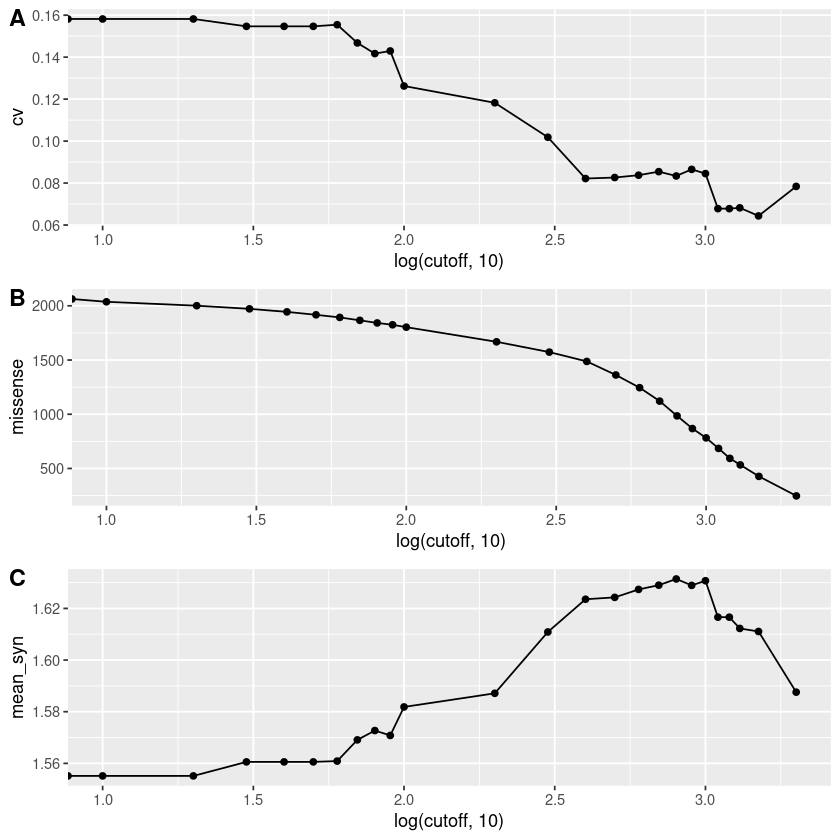

In [161]:
# need to write a function that takes in syn, looks at different cut offs of total Row, 
# and gives out a cv for that cut off of total row. 
# also gives the number of 

df <- data.frame(cutoff = double(),synonymous=double(), cv=double(), 
                 missense = double(), mean_syn=double(), median_syn=double())

totCutoff = c(0,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,
              700,800,900,1000,1100,1200,1300,1500,2000)
for (x in totCutoff){
    a <- syn[syn$totalRow > x, ]
    ms = length(which(missense$totalRow > x))
    cv = sd(a$score)/mean(a$score)
    df[nrow(df)+1,] <- c(x, nrow(a), cv, ms, mean(a$score), median(a$score))
                
}

p1 = ggplot(df,aes(log(cutoff,10), cv)) + geom_point() + geom_line()

p2 = ggplot(df,aes(log(cutoff,10), missense)) + geom_point() + geom_line()

p3 = ggplot(df,aes(log(cutoff,10), mean_syn)) + geom_point() + geom_line()

ggarrange(p1,p2,p3,labels = c("A","B","C"), ncol=1, nrow=3)